# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

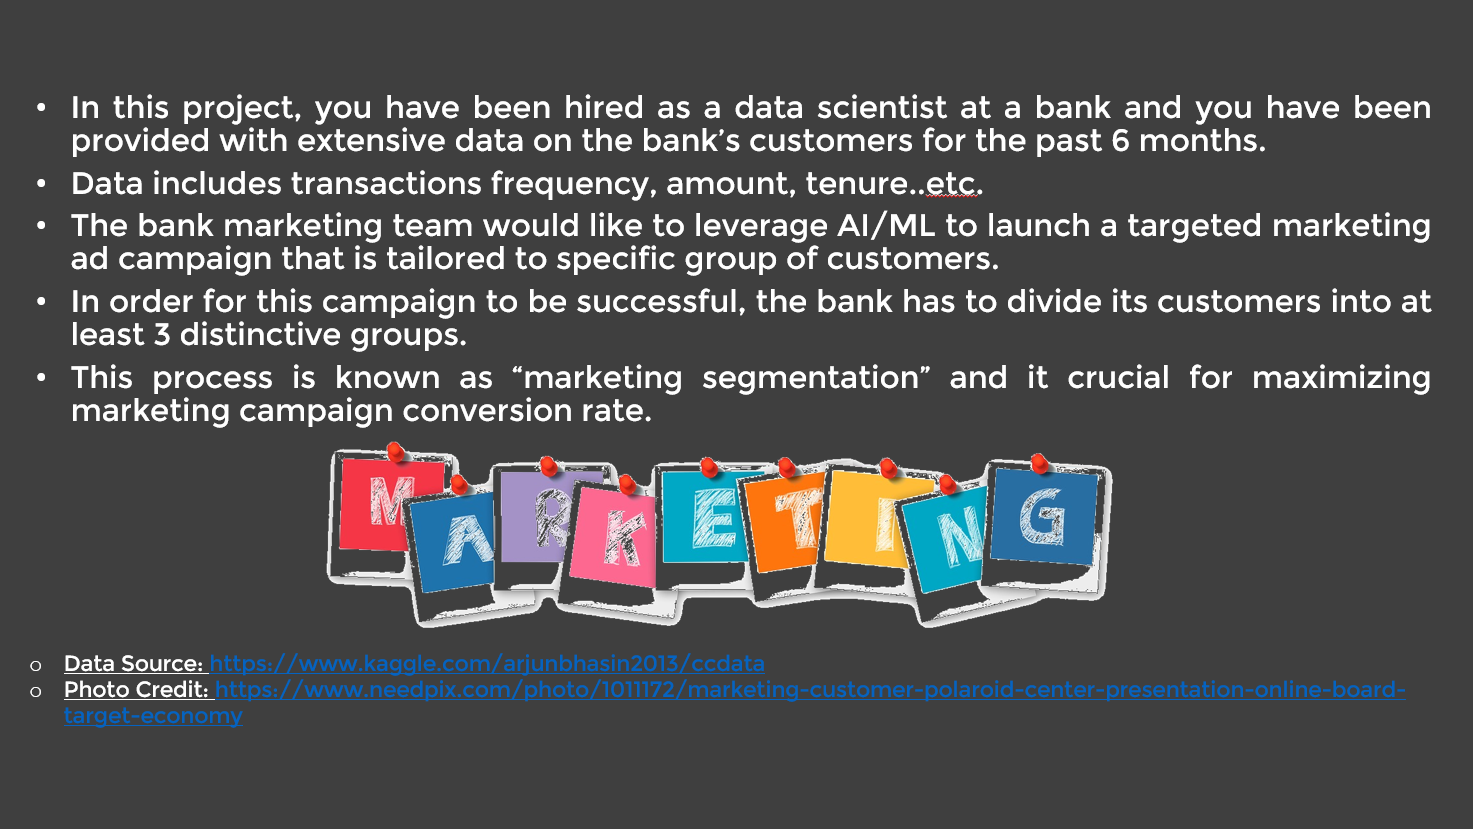

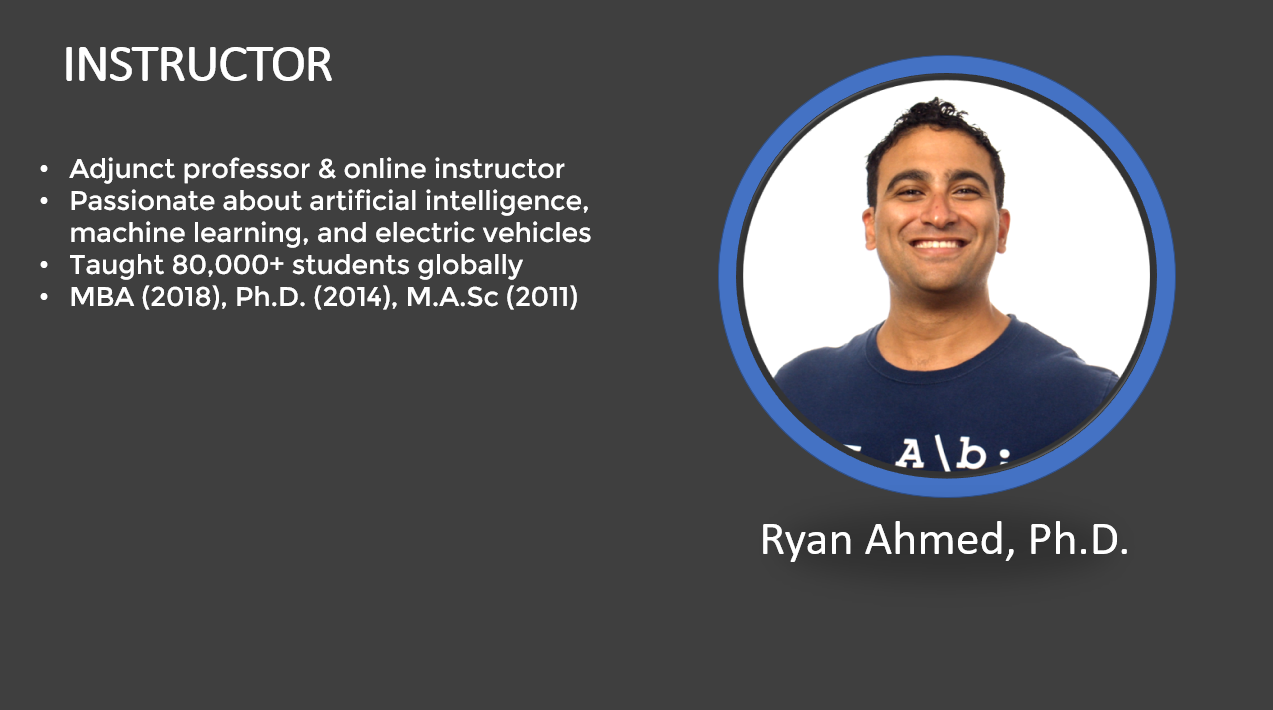

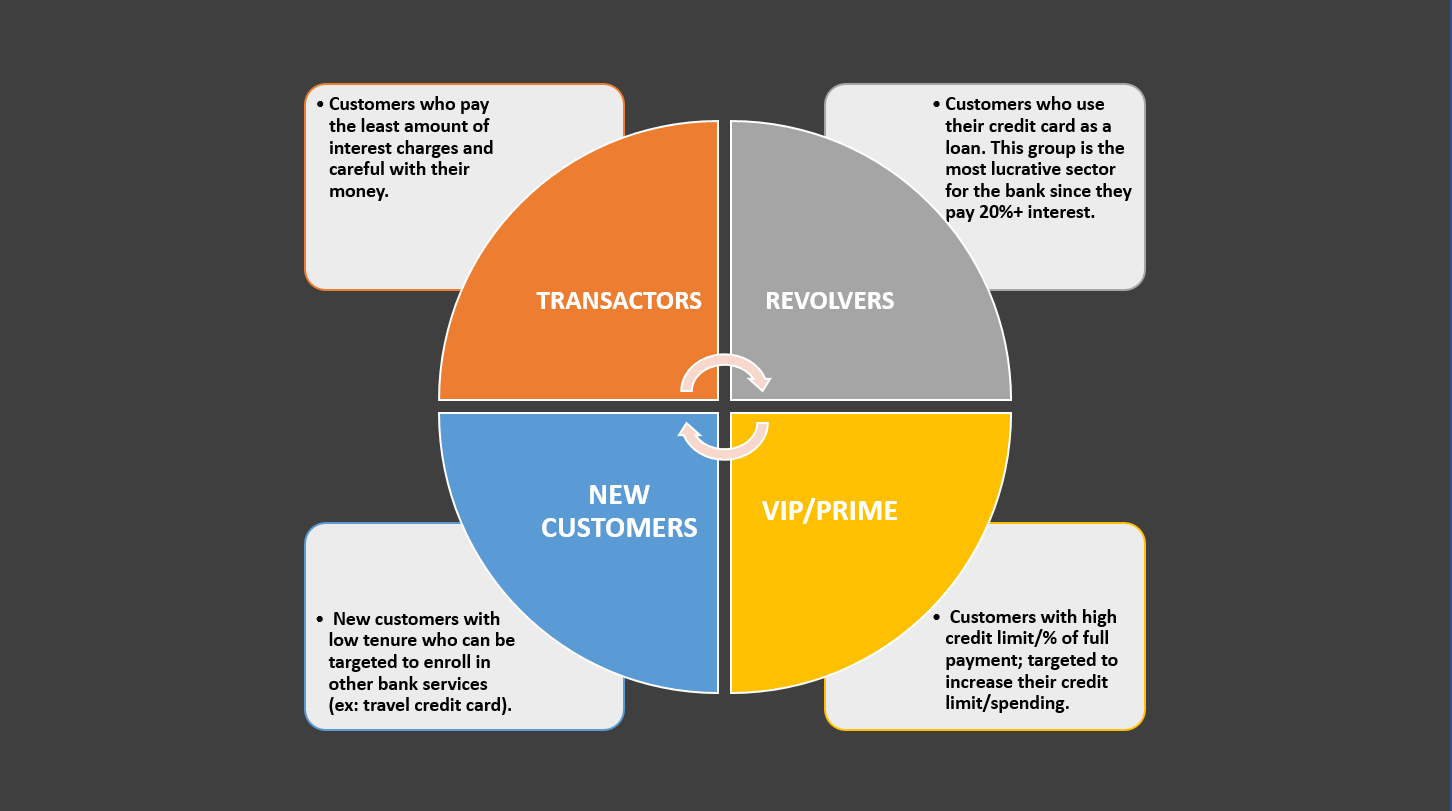

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [47]:
# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv('marketing_data.csv')

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [48]:
creditcard_df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [49]:
# Let's apply info and get additional insights on our dataframe
# 18 features with 8950 points  
creditcard_df.info()
# Here you can see we have some columns with NA's (Minimum_Payments, CREDIT_LIMIT)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

MINI CHALLENGE #1: 
 - What is the average, minimum and maximum "BALANCE" amount?


In [50]:
print('Average: ',creditcard_df['BALANCE'].mean())
print('Minimum ',creditcard_df['BALANCE'].min())
print('Maximum: ',creditcard_df['BALANCE'].max())

Average:  1564.4748276781038
Minimum  0.0
Maximum:  19043.13856


In [51]:
# Let's apply describe() and get more statistical insights on our dataframe
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9 - on average the balance is being updated quite frequently
# Purchases average is $1000 
# one off purchase average is ~$600
# Average purchases frequency is around 0.5 - around 50% chance of making a purchase
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# these are around .2, .3 so quite low
# Average credit limit ~ 4500
# Percent of full payment is 15% -- paying 20% interest on credit cards is hard so this is surprising that only 15% pay their credit card in full 
# Average tenure is 11 years

creditcard_df.describe()


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

MINI CHALLENGE #2: 
- Obtain the features (row) of the customer who made the maximim "ONEOFF_PURCHASES"
- Obtain the features of the customer who made the maximum cash advance transaction? how many cash advance transactions did that customer make? how often did he/she pay their bill?

In [52]:
# Customer that made the max 'ONEOFF_PURCHASES'
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == creditcard_df['ONEOFF_PURCHASES'].max()]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [53]:
# What are the features of the customer who made the max cash advance transaction?
# How many cash advance transactions did that customer make? 123 - this is quite high
# How often did he/she pay their bill? They never paid payment in full
# This is a great customer for the bank because they will bring in a lot of money
# This customer uses a lot of cash advances and pays a high interest since they never pay their credit card in full
creditcard_df[creditcard_df['CASH_ADVANCE'] == creditcard_df['CASH_ADVANCE'].max()]


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

# TASK #3: VISUALIZE AND EXPLORE DATASET

<AxesSubplot:>

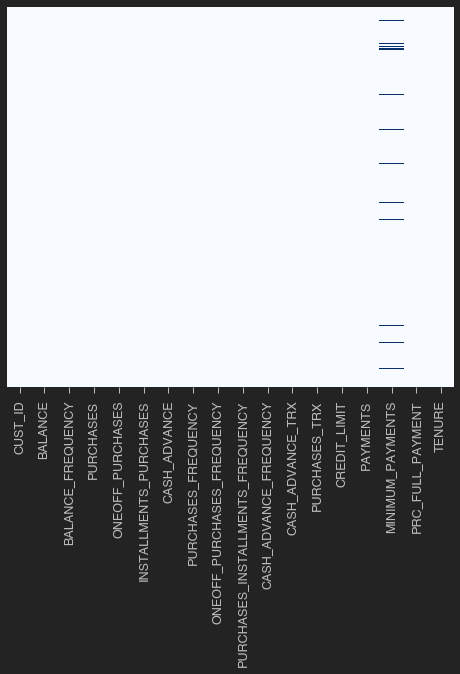

In [54]:
# Let's see if we have any missing data, luckily we don't have many!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
# Minimum payments has some missing information 


In [55]:
#how many missing elements do we have in the dataframe?
creditcard_df.isnull().sum()

# Minimum payments has 313 missing elements
# Credit Limit has 1 missing element
# We need to fill in these columns because we cannot train an ML model with missing elements


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [56]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


In [57]:
# Check to see if Minimum Payments still has missing elements
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

MINI CHALLENGE #3: 
 - Fill out missing elements in the "CREDIT_LIMIT" column
 - Double check and make sure that no missing elements are present

In [58]:
# Fill missing elements in the Credit Limit column with mean
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()


<AxesSubplot:>

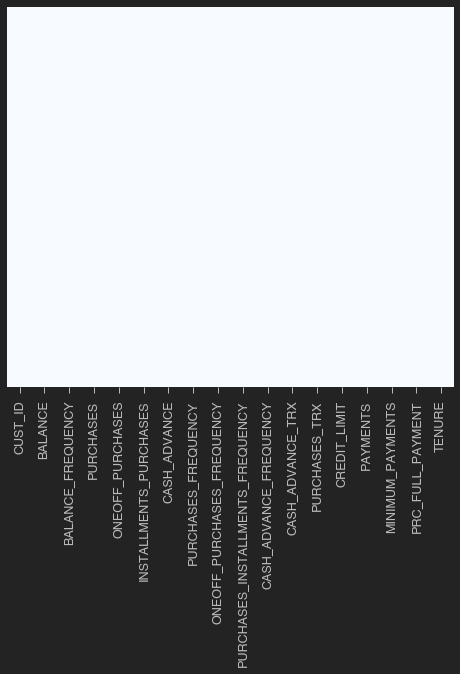

In [59]:
# Check if there are missing elements visually
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

# No more missing elements

In [60]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [61]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

MINI CHALLENGE #4: 
- Drop Customer ID column 'CUST_ID' and make sure that the column has been removed from the dataframe

In [62]:
creditcard_df = creditcard_df.drop('CUST_ID', axis = 1)

In [63]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [64]:
n = len(creditcard_df.columns)
n

17

In [65]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

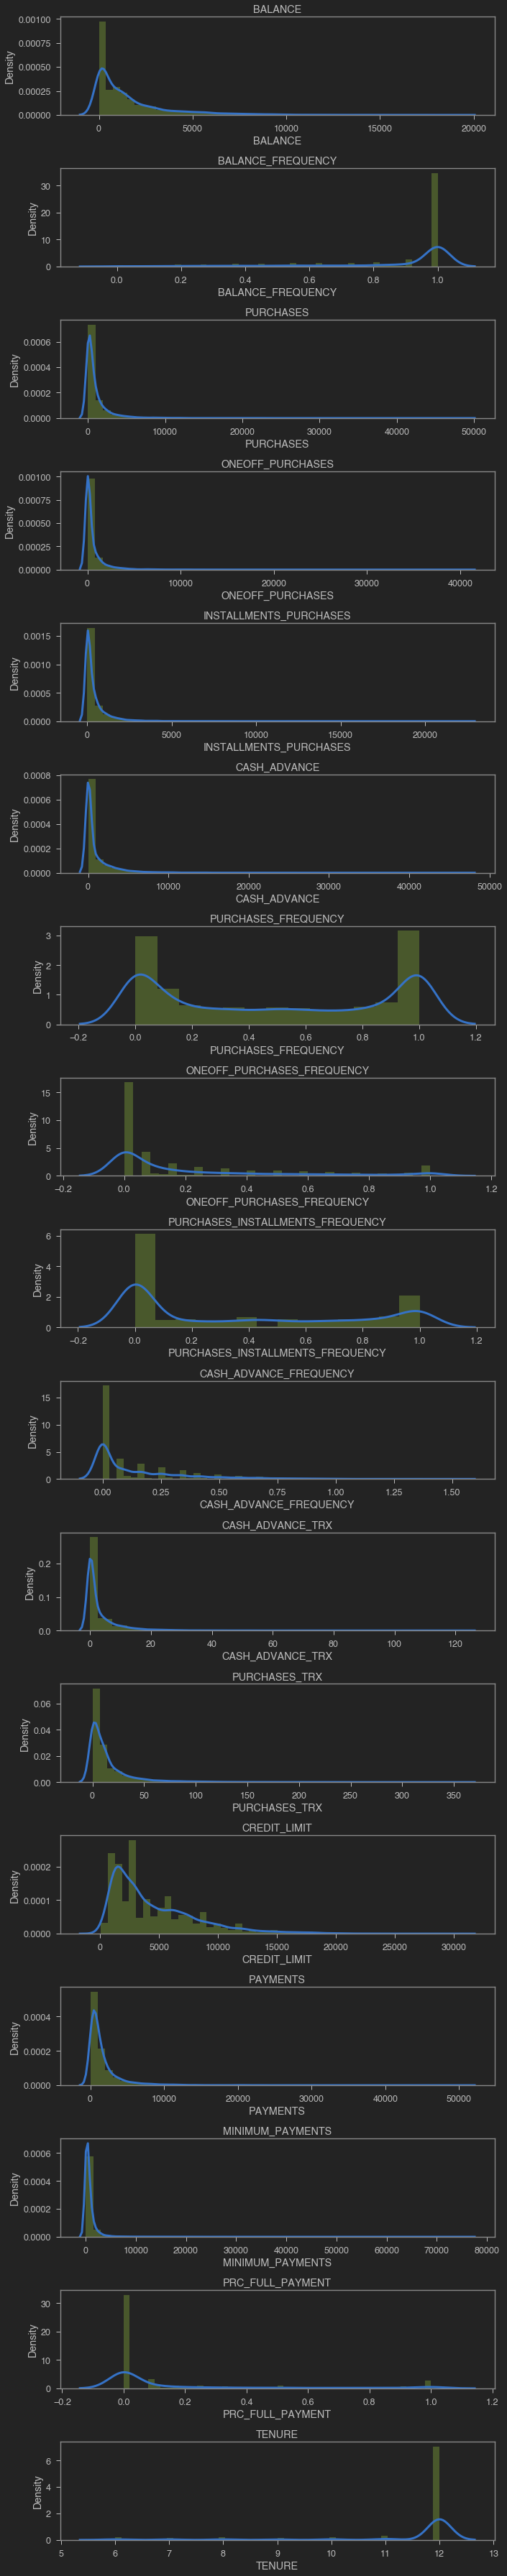

In [66]:
import warnings 
warnings.simplefilter(action = 'ignore')

# distplot combines the matplotlib.hist function with seaborn kdeplot() 
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers -- one group frequency is almost 0 the other one the frequency is almost one
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0 -- most of the customers don't pay balance in full 
# Credit limit average is around $4500
# Most customers are ~11 years tenure - loyal customers for the bank


# For every column in creditcard df -- everytime create a subplot and everytime plot one of the feature


plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)): 
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()




MINI CHALLENGE #5: 
- Obtain the correlation matrix between features

In [67]:
matrix = creditcard_df.corr()
matrix

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531267           0.095795   0.356959   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.394282           0.114249   0.093515   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319721                0.256496   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.048597                0.131687   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303983             0.119778   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.139223             0.002976   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

<AxesSubplot:>

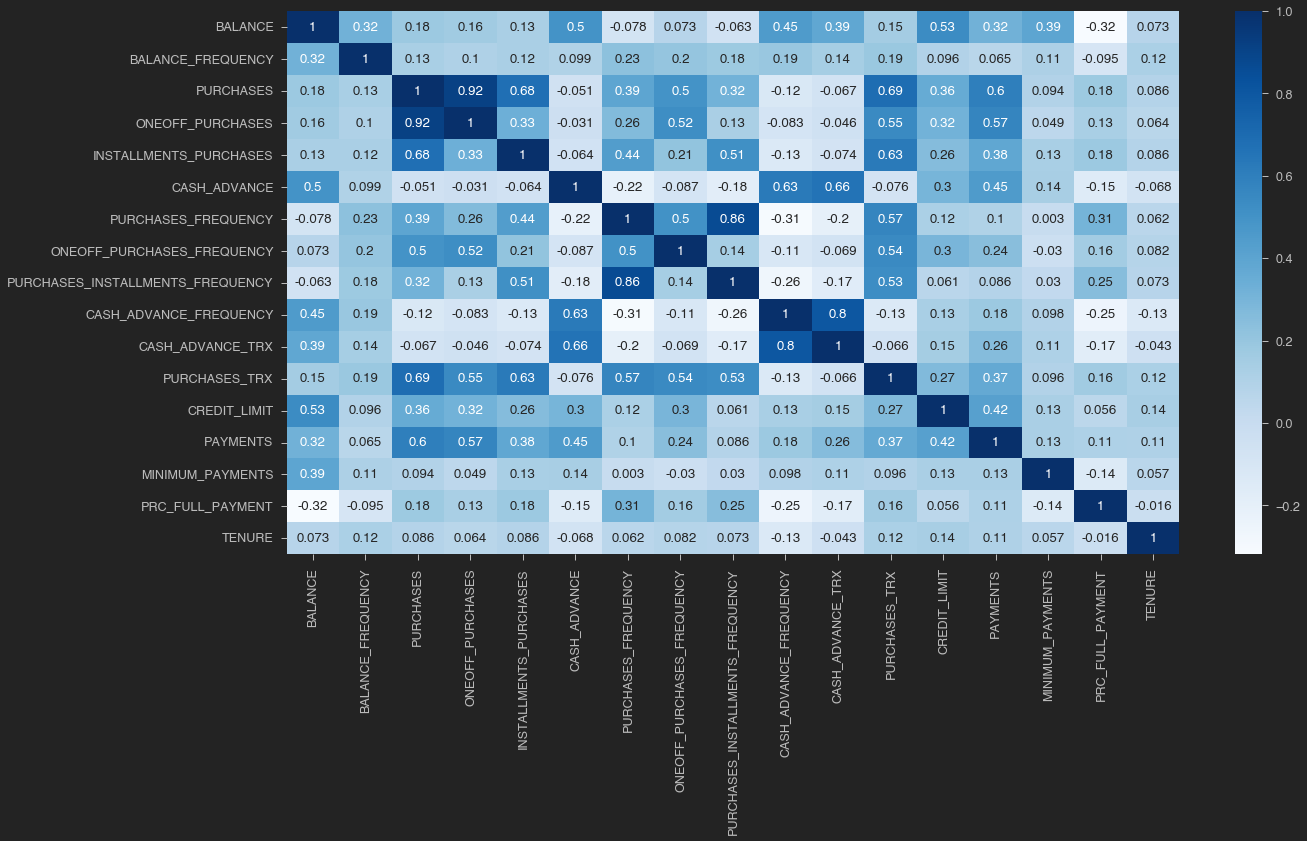

In [68]:
f, ax = plt.subplots(figsize = (20,10))
sns.heatmap(matrix, cmap="Blues", annot = True)

# Some insights from this heatmap are that purchases have high correlation between one off purchases and installment purchases and purchases transactions


# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

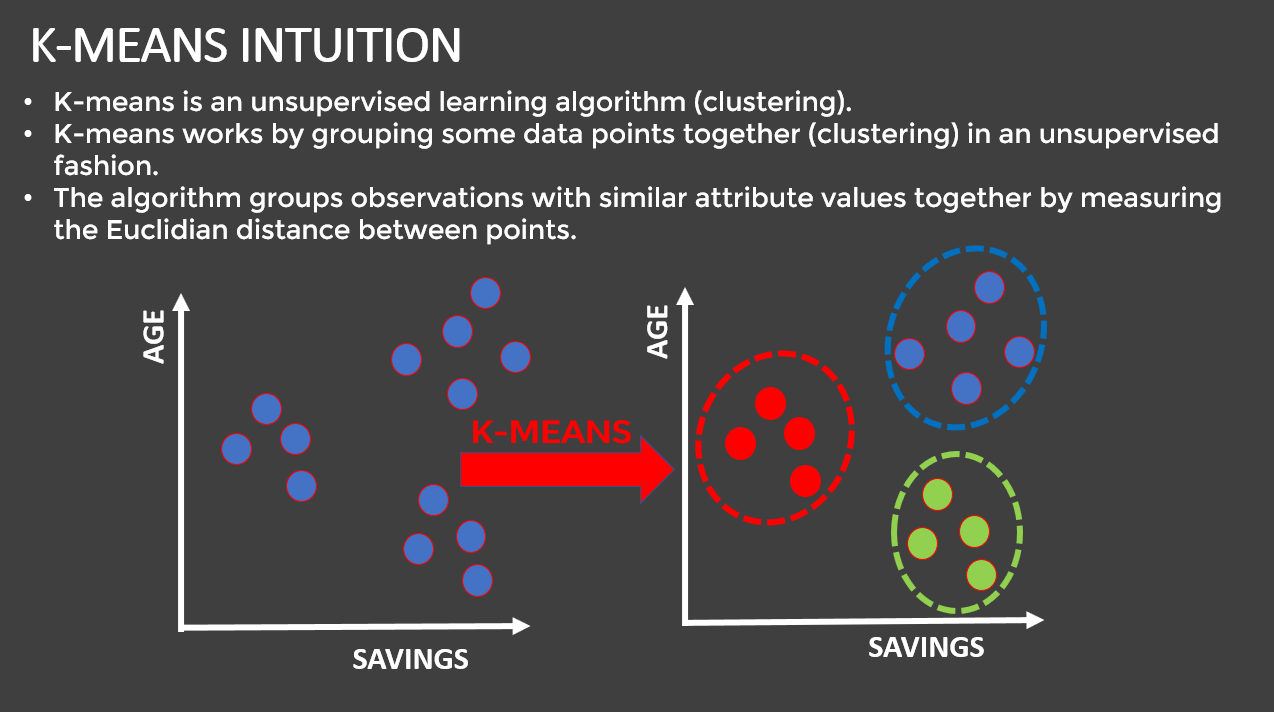

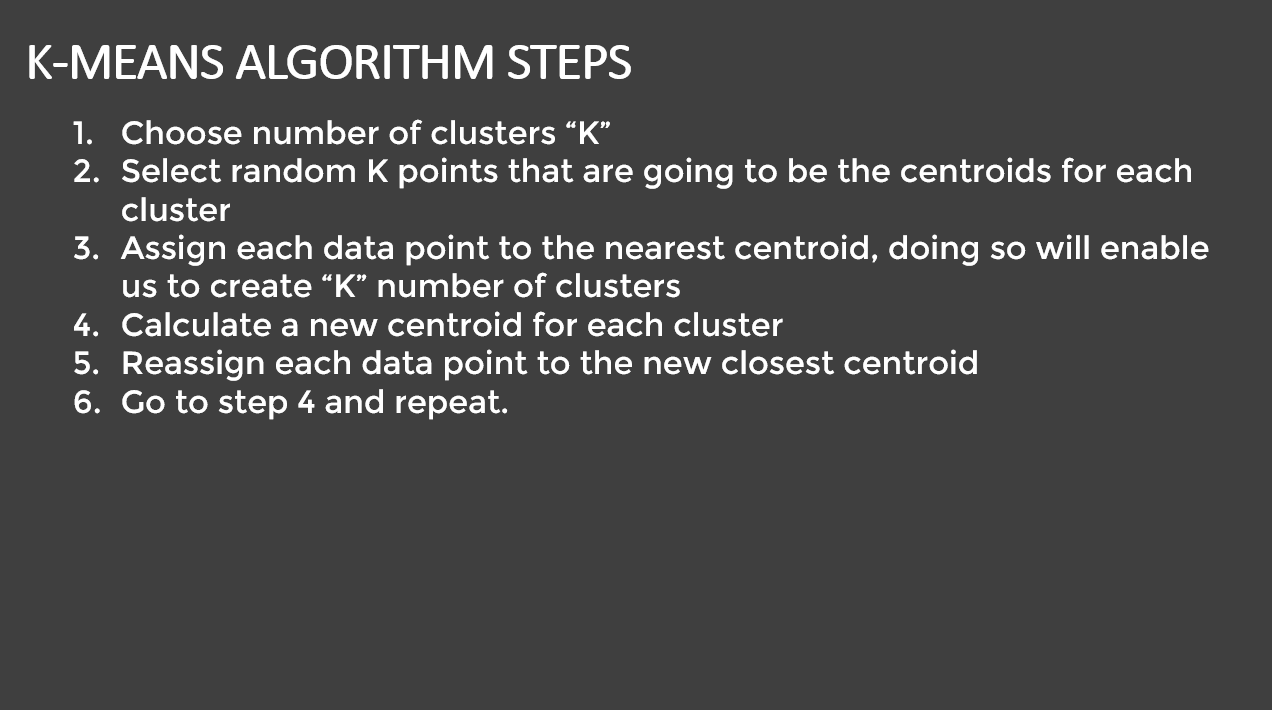

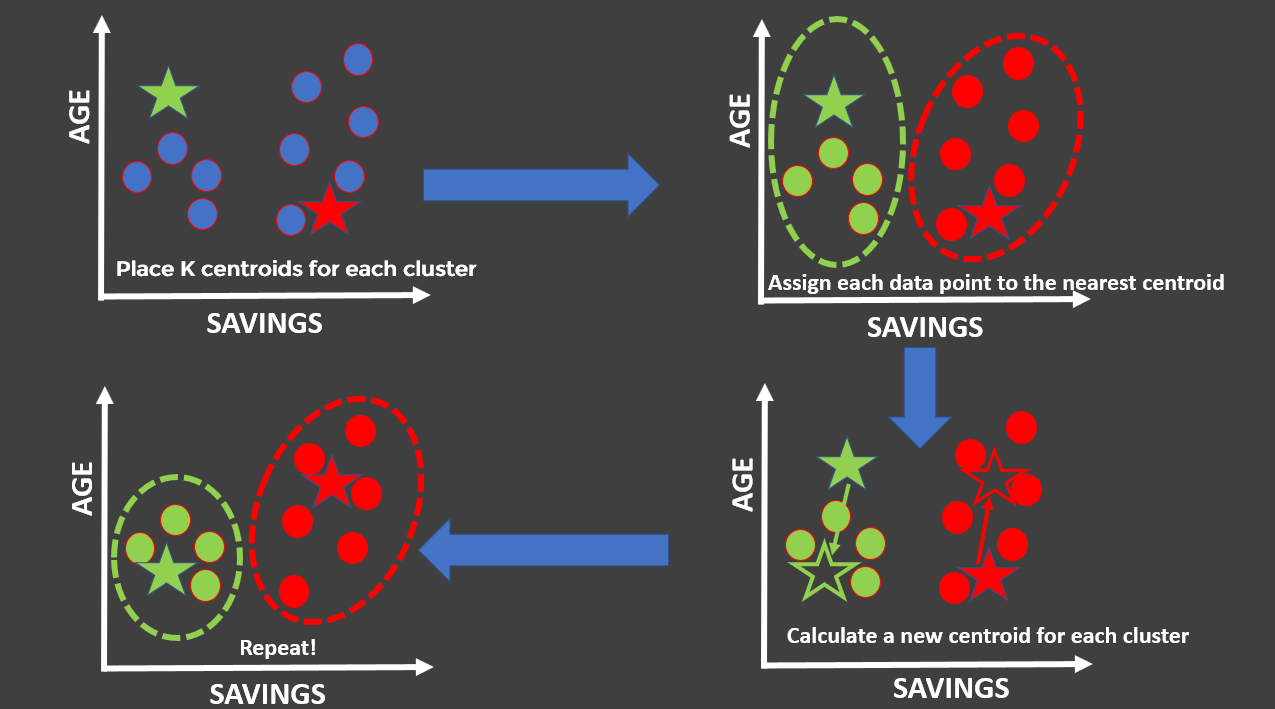

MINI CHALLENGE #6: 
- Which of the following conditions could terminate the K-means clustering algorithm? (choose 2)
    - K-means terminates after a fixed number of iterations is reached  
    - K-means terminates when the number of clusters does not increase between iterations
    - K-means terminates when the centroid locations do not change between iterations

   


In [69]:
# Answer to above question is A and C


# TASK #5: LEARN HOW TO OBTAIN THE OPTIMAL NUMBER OF CLUSTERS (ELBOW METHOD)

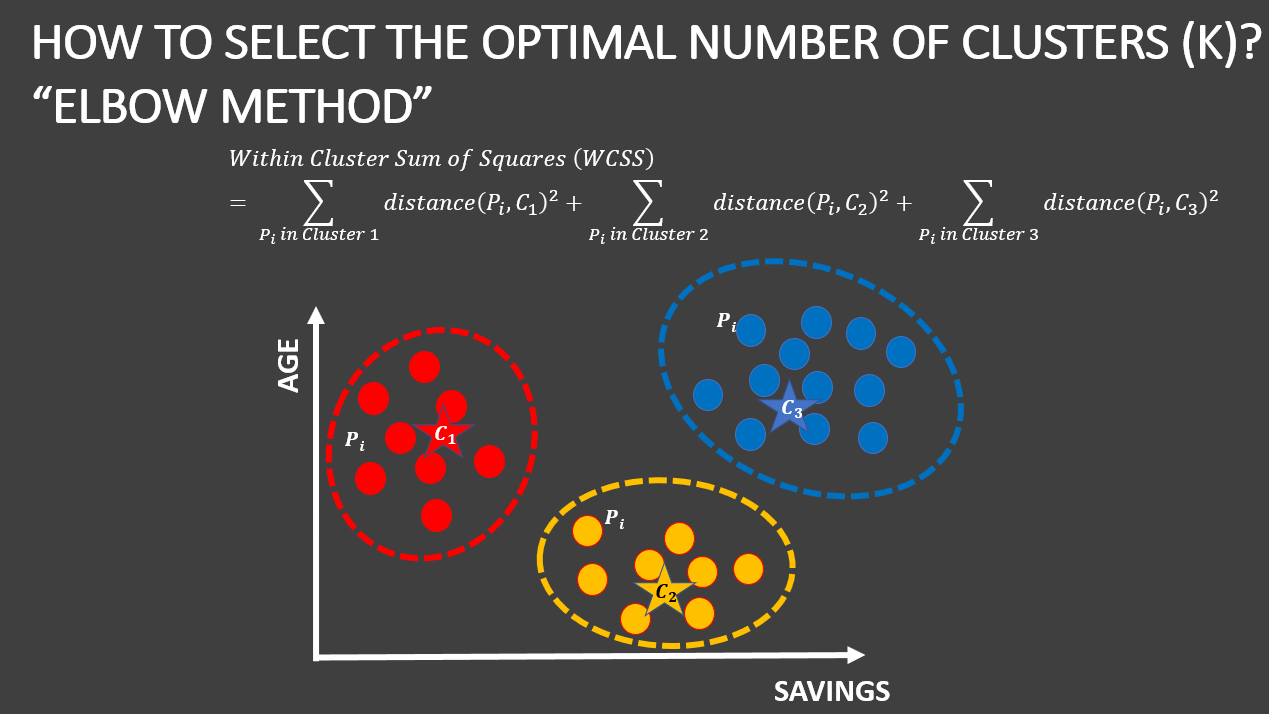

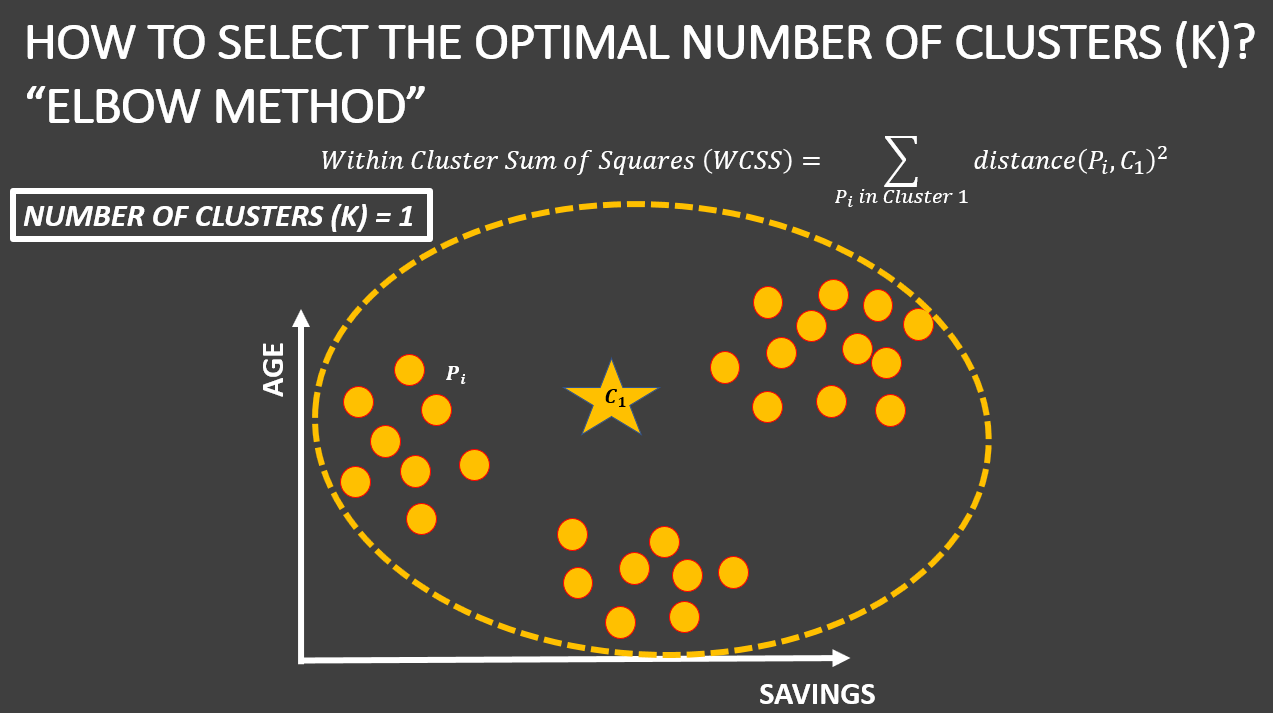

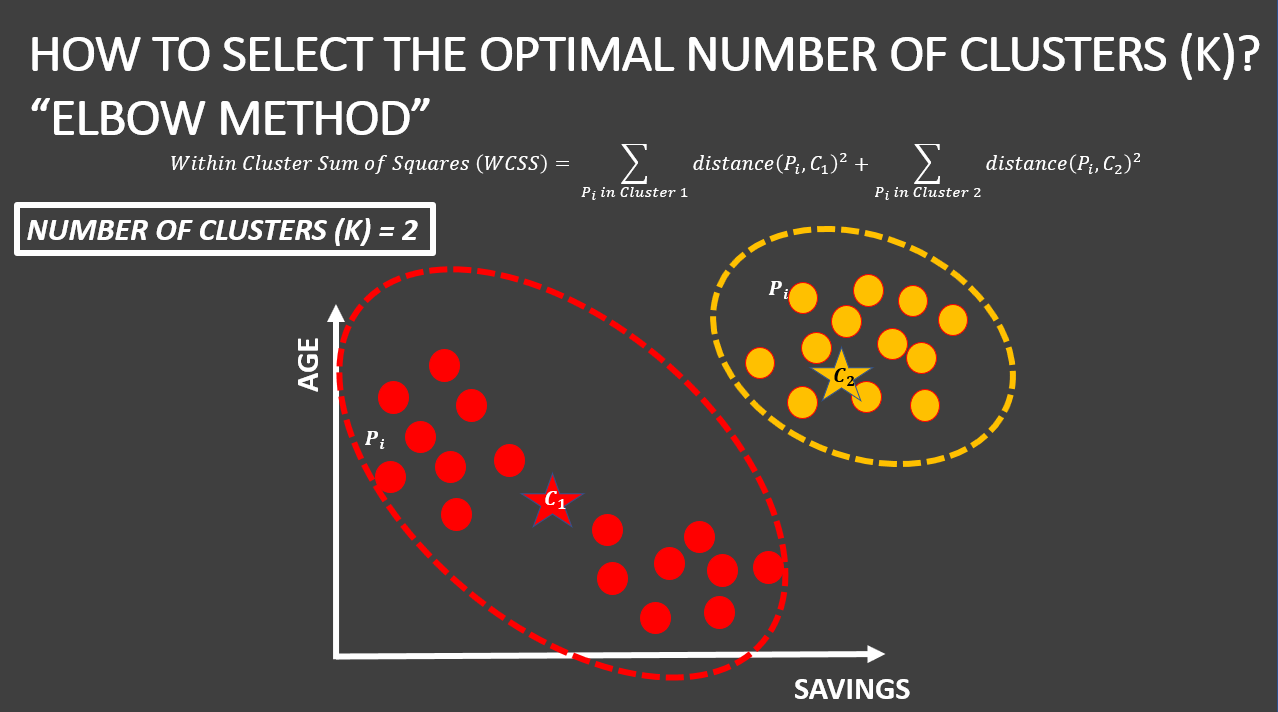

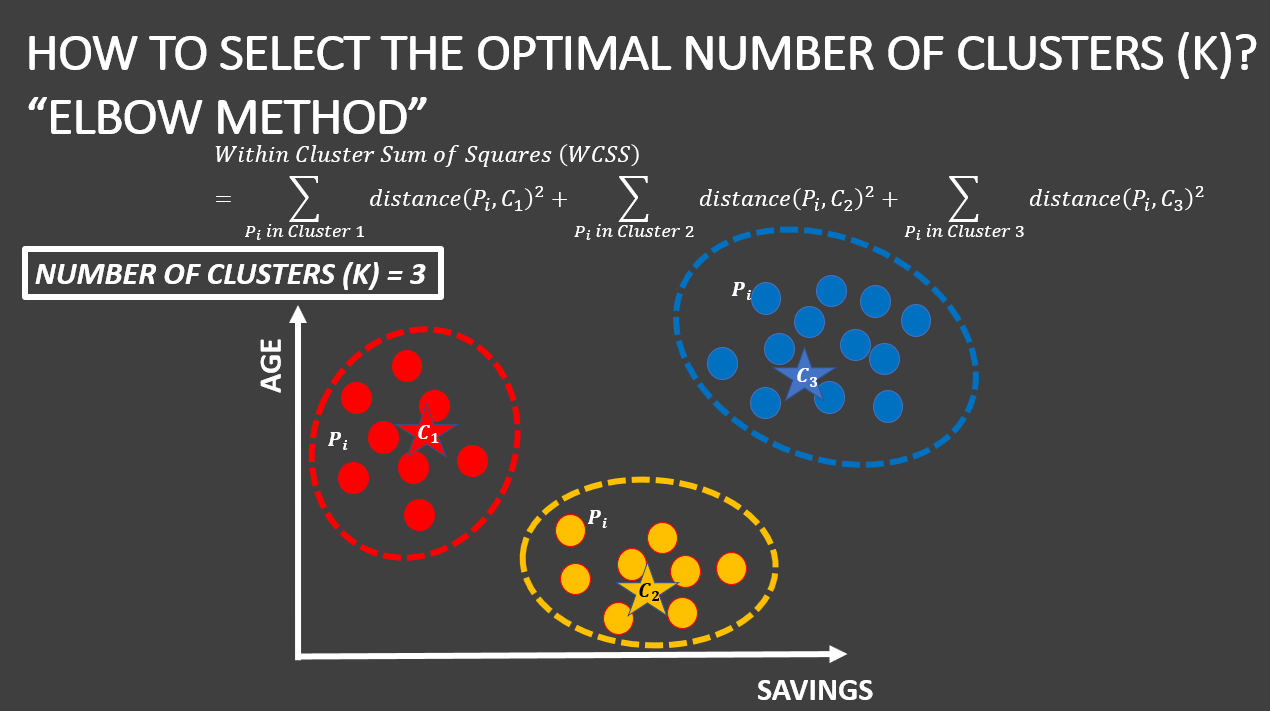

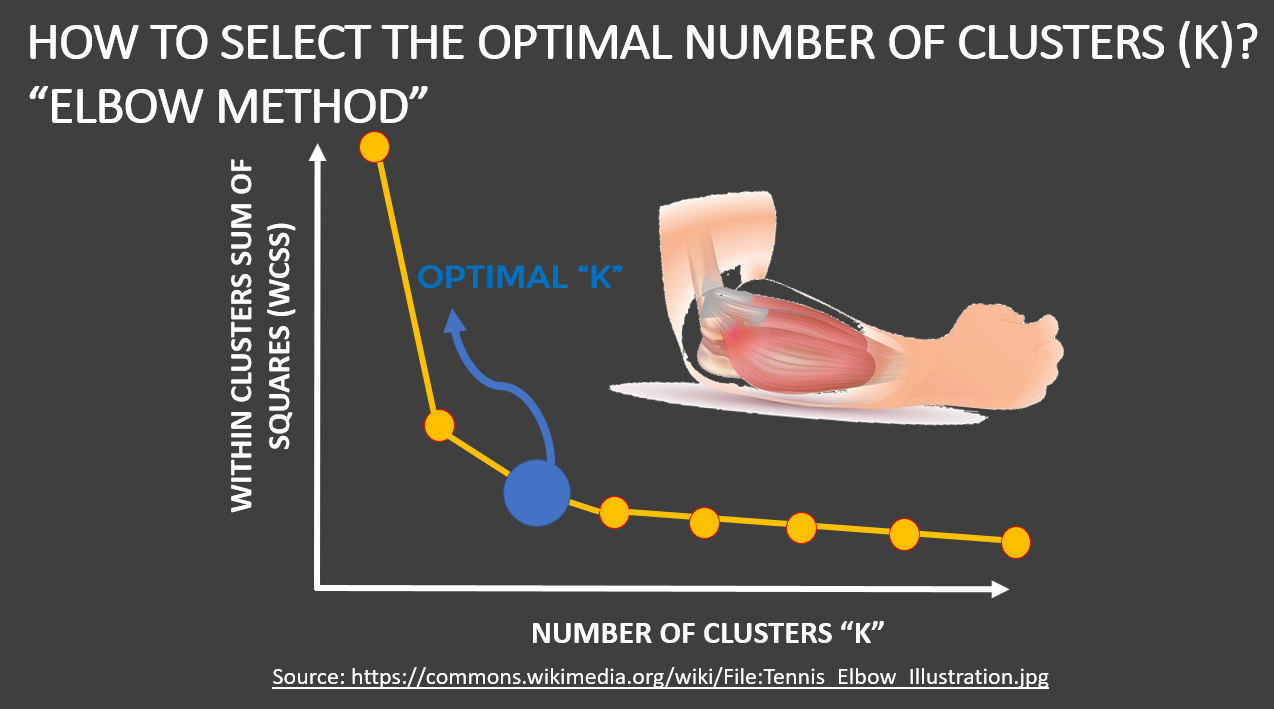

# TASK #6: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [70]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [71]:
creditcard_df_scaled.shape

(8950, 17)

In [72]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

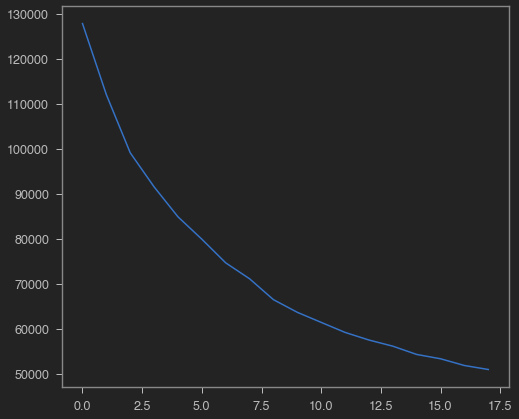

In [78]:
# Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
#       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
#       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
#       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
#       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
#       'TENURE'], dtype='object')

#create a for loop to calculate the WCSS for various cluster nubmers

scores_1 = []
range_values = range(2,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i )
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_) #inertia_ one of values that comes in KMeans function
    
plt.plot(scores_1, 'bx-')
    
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7 or 8.

MINI CHALLENGE #7:
 - Let's assume that our data only consists of the first 7 columns of "creditcard_df_scaled", what is the optimal number of clusters would be in this case? modify the code and rerun the cells. 

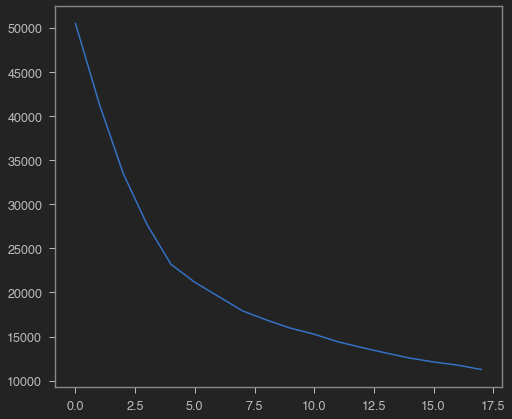

In [86]:
scores_1 = []
range_values = range(2,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i )
    kmeans.fit(creditcard_df_scaled[:,:7]) # select only the first 7 columns of the dataframe 
    scores_1.append(kmeans.inertia_)
    
plt.plot(scores_1, 'bx-')

# For 7 features the optimal number of clusters is around 5 

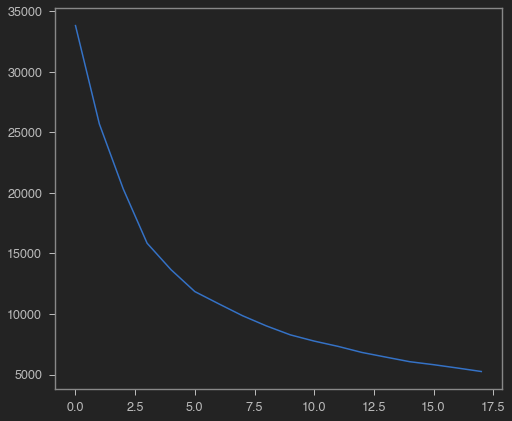

In [87]:
# Find the optimal number of clusters when our dataset only contains the first 5 columns

scores_1 = []
range_values = range(2,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i )
    kmeans.fit(creditcard_df_scaled[:,:5]) # select only the first 5 columns of the dataframe
    scores_1.append(kmeans.inertia_)
    
plt.plot(scores_1, 'bx-')

# For 5 features the optimal number of clusters is around 4-6

# TASK #7: APPLY K-MEANS METHOD

In [110]:
# Use the optimal number of clusters for the whole dataset in the below code 
# We found earlier that 7 or 8 was the optimal number of clusters 
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled) 
labels = kmeans.labels_ 

In [111]:
kmeans.cluster_centers_.shape # this gives us all the centroids

(7, 17)

In [112]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers
# The data here is already scaled so we want to scale it back to its original form

BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0 -0.351649         -0.335777  -0.279646        -0.206989   
1  1.641931          0.397095  -0.216912        -0.151928   
2  0.004346          0.402860  -0.347722        -0.229936   
3  1.845310          0.340595  12.297201        12.823670   
4 -0.332005          0.360584   0.070977        -0.044240   
5  0.683357          0.467024   2.042400         1.680480   
6 -0.701735         -2.132679  -0.307031        -0.232805   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.280593     0.044325           -0.166084   
1              -0.233837     1.951903           -0.464220   
2              -0.399522    -0.109785           -0.825567   
3               5.516158     0.272530            1.043177   
4               0.248801    -0.367746            0.994444   
5               1.741776    -0.217624            1.154737   
6              -0.298160    -0.322394           -0.530884   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.270088                        -0.203086   
1                  -0.184633                        -0.420721   
2                  -0.368619                        -0.749692   
3                   2.145028                         0.896761   
4                   0.287267                         0.890844   
5                   1.753478                         1.033094   
6                  -0.440472                        -0.418225   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.286784        -0.010196     -0.378431    -0.567433   
1               1.876806         1.865343     -0.260528     1.002326   
2               0.079642        -0.045032     -0.471376    -0.311725   
3              -0.380373        -0.109730      4.556136     3.185151   
4              -0.471068        -0.360025      0.271095    -0.103199   
5              -0.331801        -0.235995      2.387266     1.198844   
6              -0.523420        -0.377892     -0.413581    -0.173791   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.390617        -0.209744         0.028629 -3.174617  
1  0.771636         0.541830        -0.396920  0.068877  
2 -0.251390        -0.005258        -0.455845  0.272737  
3  9.047799         1.030898         1.222264  0.298409  
4 -0.153368        -0.088892         0.360662  0.272832  
5  1.122987         0.295635         0.404668  0.313354  
6 -0.192767        -0.257563         0.289216  0.202287

In [113]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers


# Sixth Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($103) and cash advance ($301), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance (~$5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Fourth customer cluster (VIP/Prime): high credit limit $12K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fifth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 




BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0   832.547141          0.797728    405.737783       248.878789   
1  4982.015882          0.971339    539.769860       340.268058   
2  1573.520922          0.972704    260.291119       210.790685   
3  5405.330935          0.957955  27276.363750     21877.102917   
4   873.434955          0.962690   1154.848204       519.007721   
5  2986.825486          0.987904   5366.824000      3381.690067   
6   103.873507          0.372059    347.227614       206.028687   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             157.330692  1071.822127            0.423693   
1             199.611478  5072.102736            0.304036   
2              49.785210   748.646793            0.159010   
3            5399.260833  1550.378389            0.909028   
4             636.054868   207.690166            0.889469   
5            1986.133933   522.502605            0.953802   
6             141.445644   302.796560            0.277281   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.121885                         0.283726   
1                   0.147378                         0.197232   
2                   0.092492                         0.066491   
3                   0.842361                         0.720833   
4                   0.288155                         0.718481   
5                   0.725554                         0.775015   
6                   0.071056                         0.198224   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.192533         3.179245      5.303459   2429.896933   
1               0.510712        15.978425      8.234088   8141.320977   
2               0.151081         2.941514      2.993183   3360.267911   
3               0.059028         2.500000    127.958333  16083.333333   
4               0.040879         0.791922     21.448251   4118.967715   
5               0.068747         1.638333     74.048333   8856.333333   
6               0.030402         0.669992      4.429759   3862.127551   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0    602.345388       375.406269         0.162088   7.268868  
1   3966.954662      2126.918395         0.037622  11.609493  
2   1005.394575       851.952289         0.020388  11.882311  
3  27925.634496      3266.671038         0.511206  11.916667  
4   1289.157280       657.046854         0.259202  11.882438  
5   4984.081773      1553.170944         0.272073  11.936667  
6   1175.101188       263.966906         0.238305  11.788030

In [114]:
labels.shape # Labels associated to each data point

(8950,)

In [115]:
labels.max()

6

In [116]:
labels.min() # 0 to 6 value labels will be applied to every row in dataframe

0

In [117]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans
# For every datapoint, we can now associate it with a certain cluster

array([3, 2, 6, ..., 0, 0, 0], dtype=int32)

In [118]:
# Concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        2  
1  4103.032597       1072.340217          0.222222      12        1  
2   622.066742        627.284787          0.000000      12        4  
3     0.000000        864.206542          0.000000      12        2  
4   678.334763        244.791237          0.000000      12        2

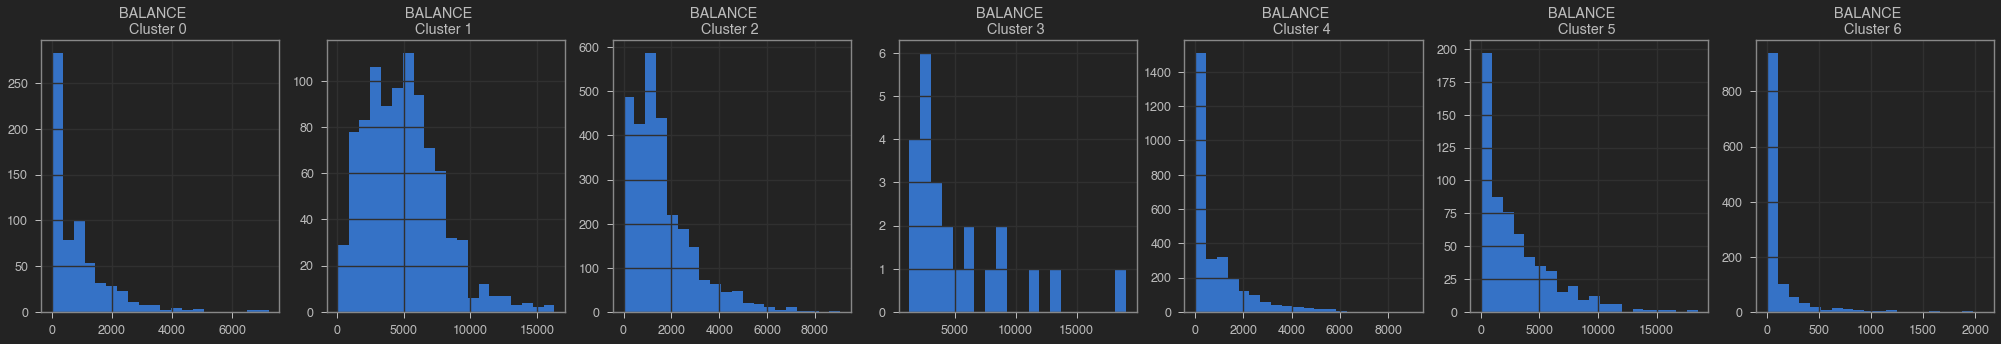

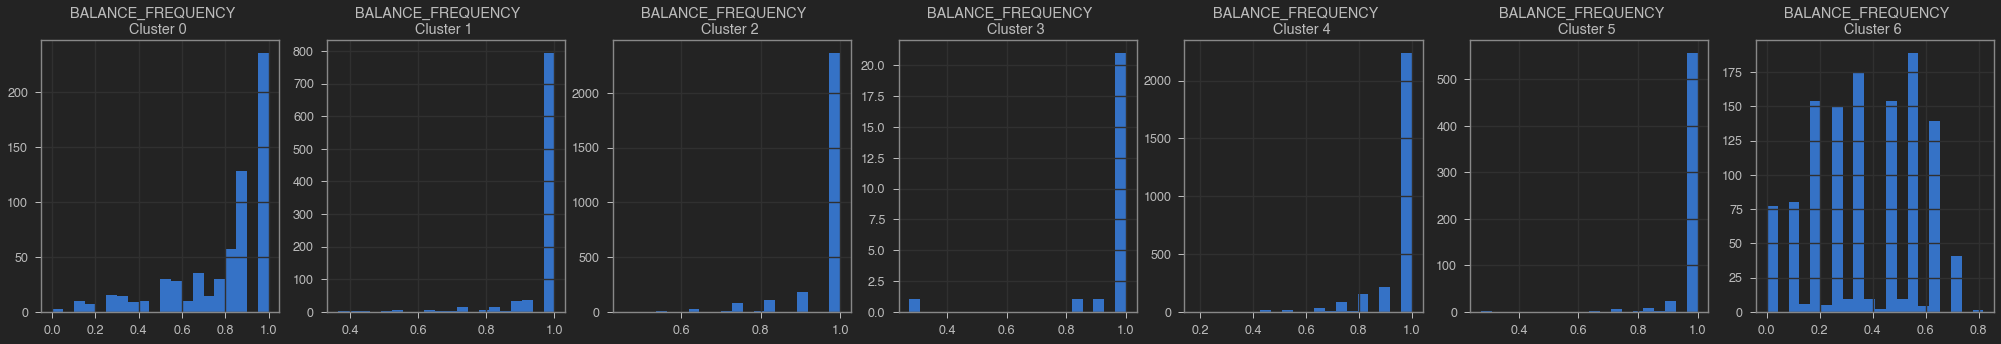

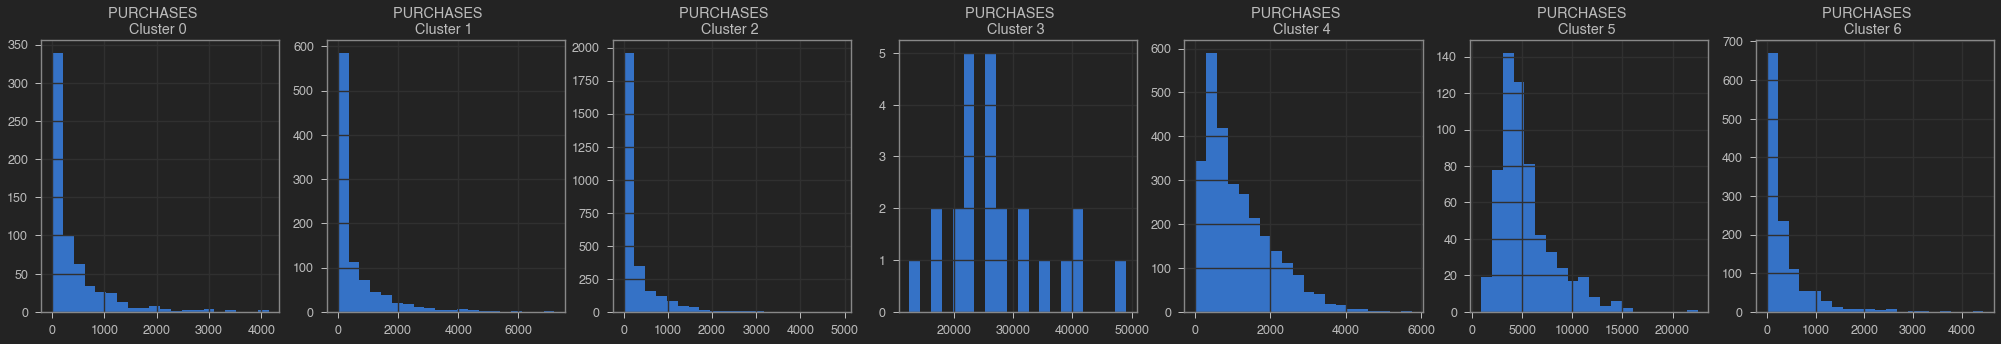

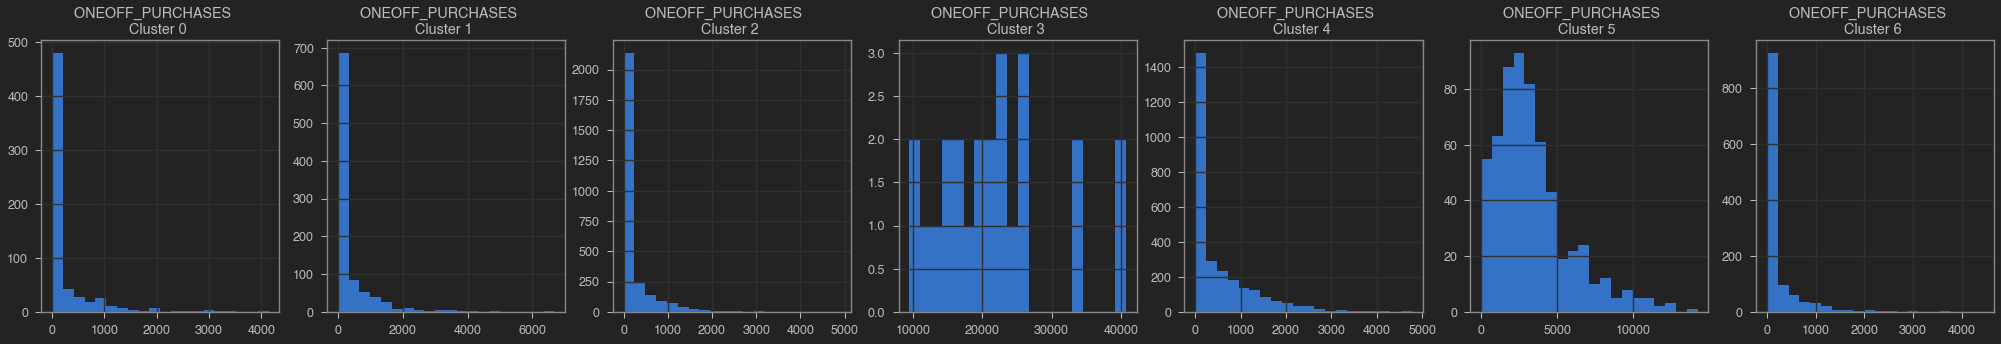

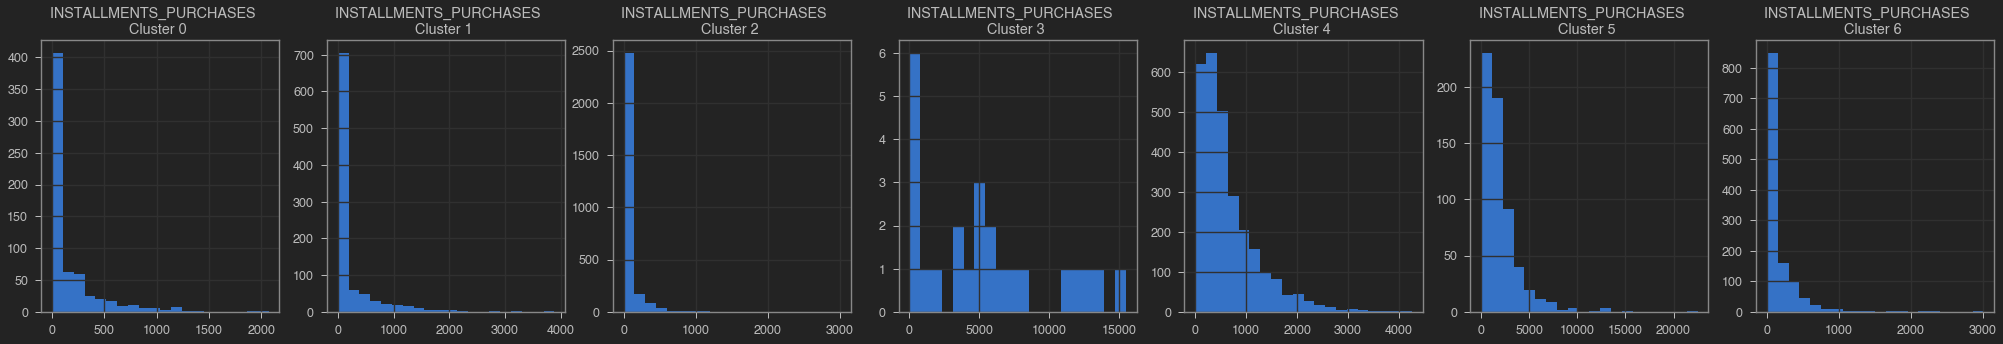

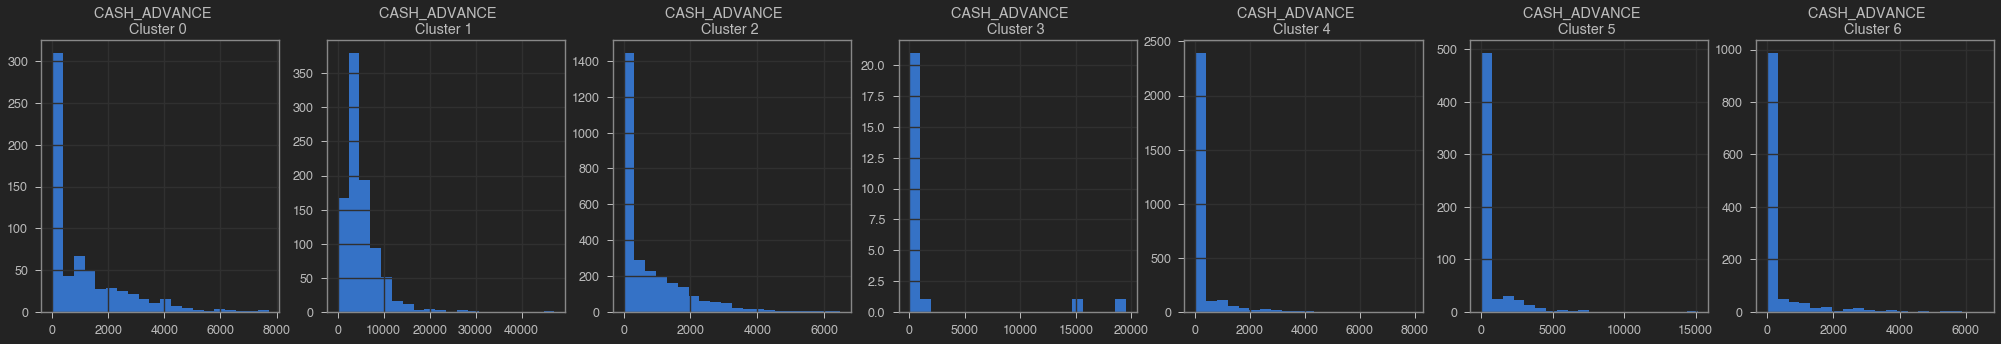

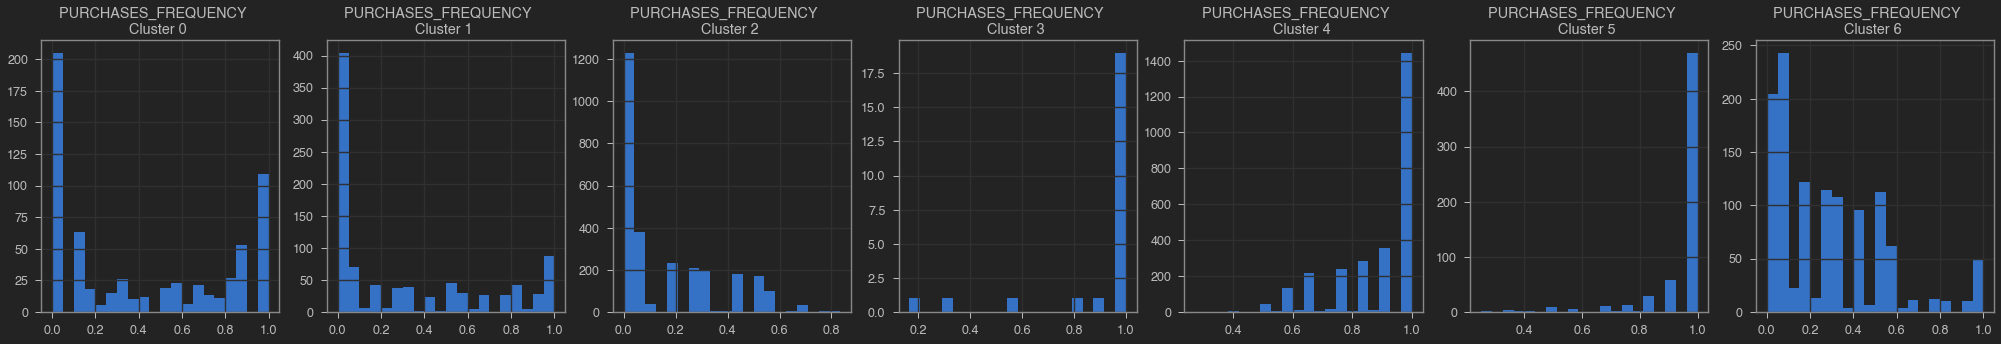

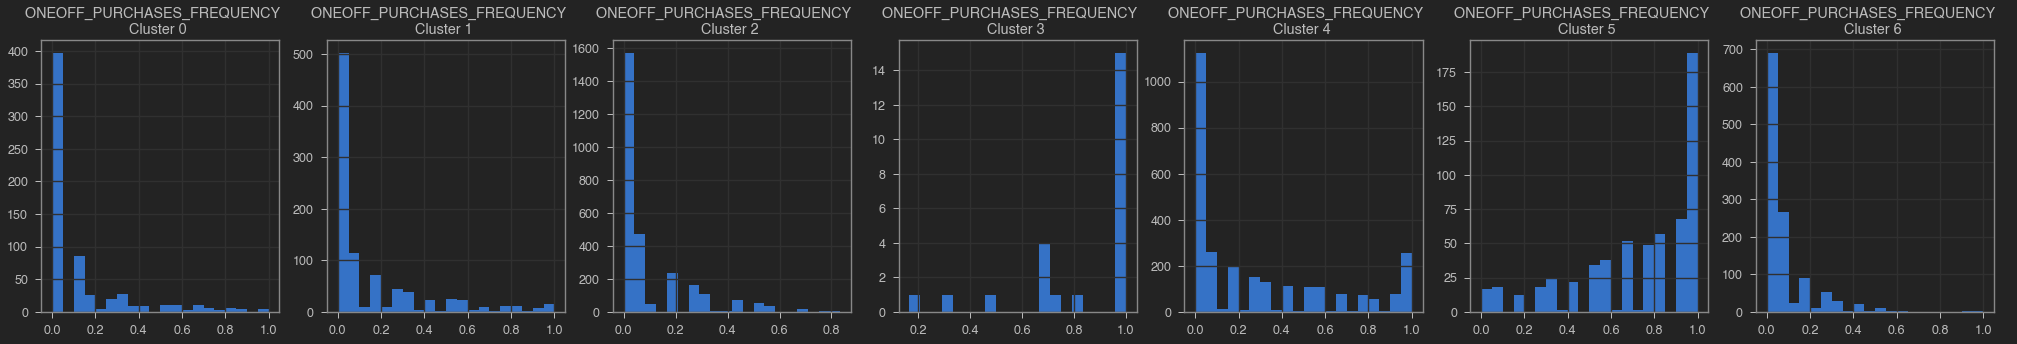

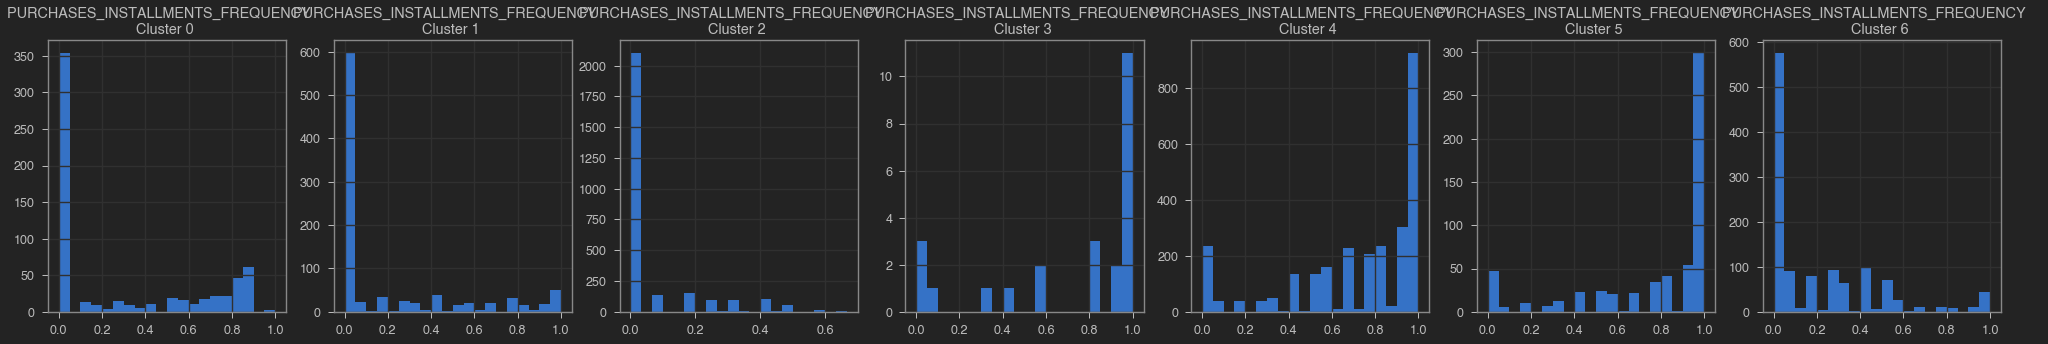

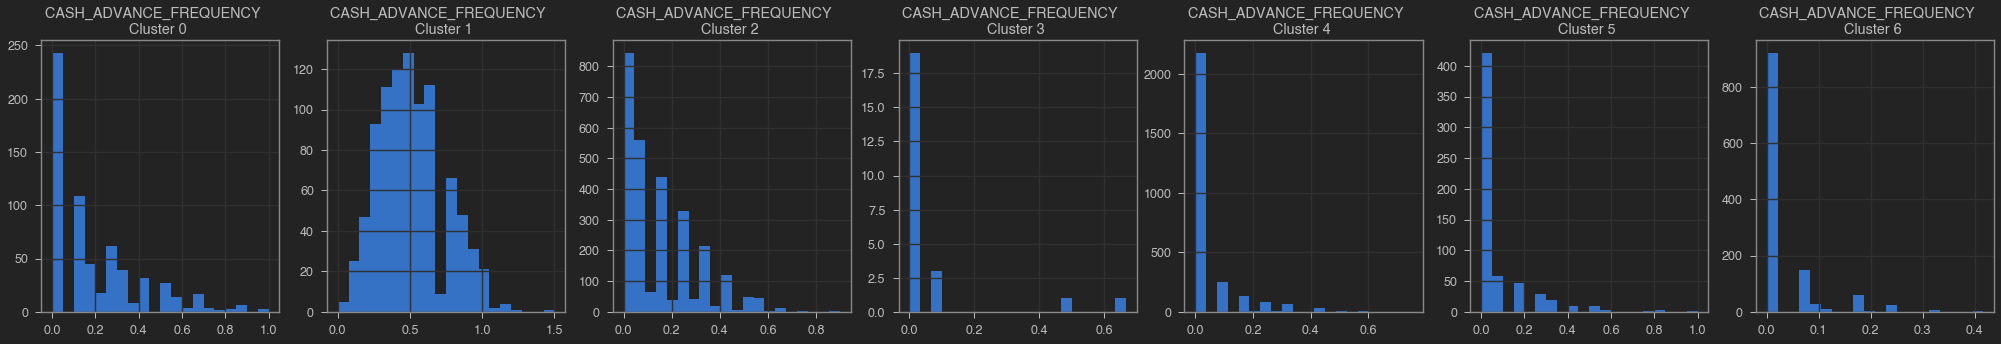

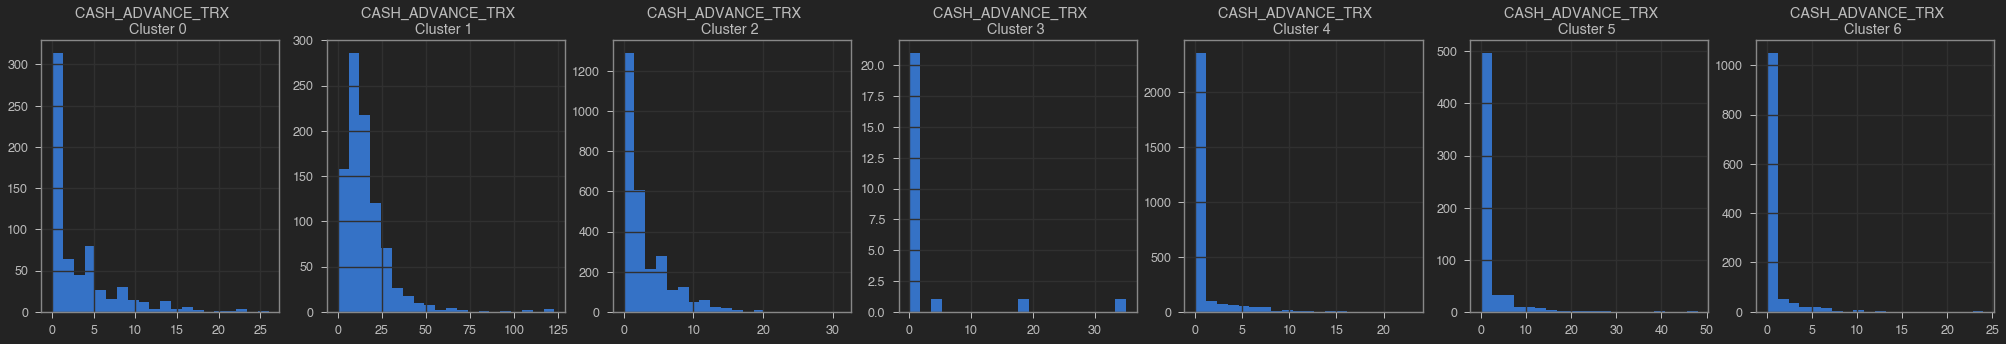

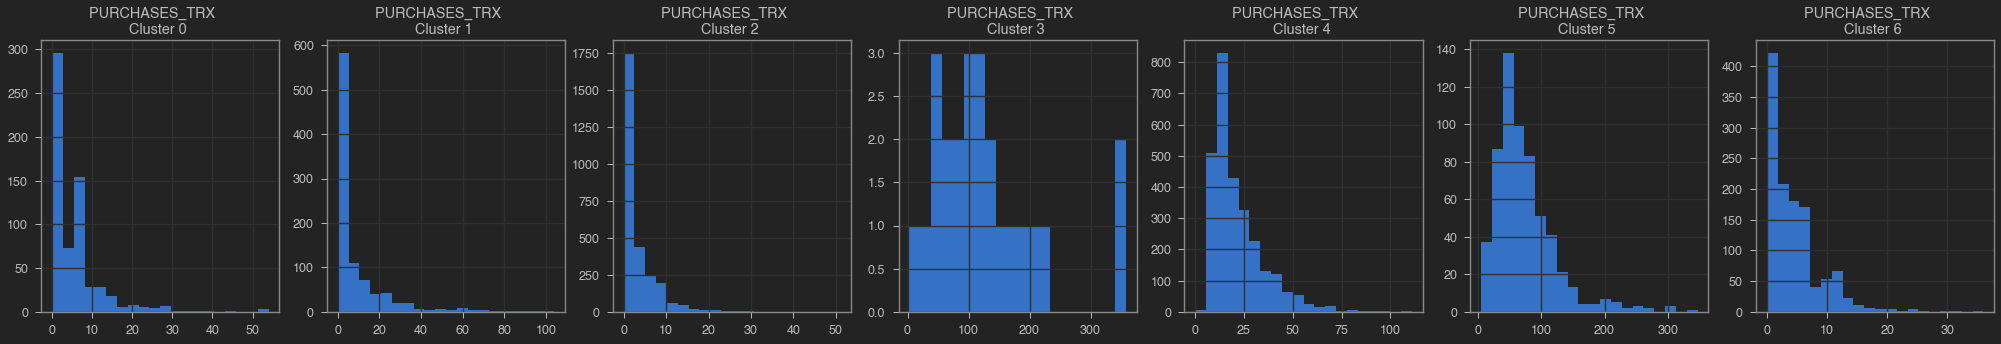

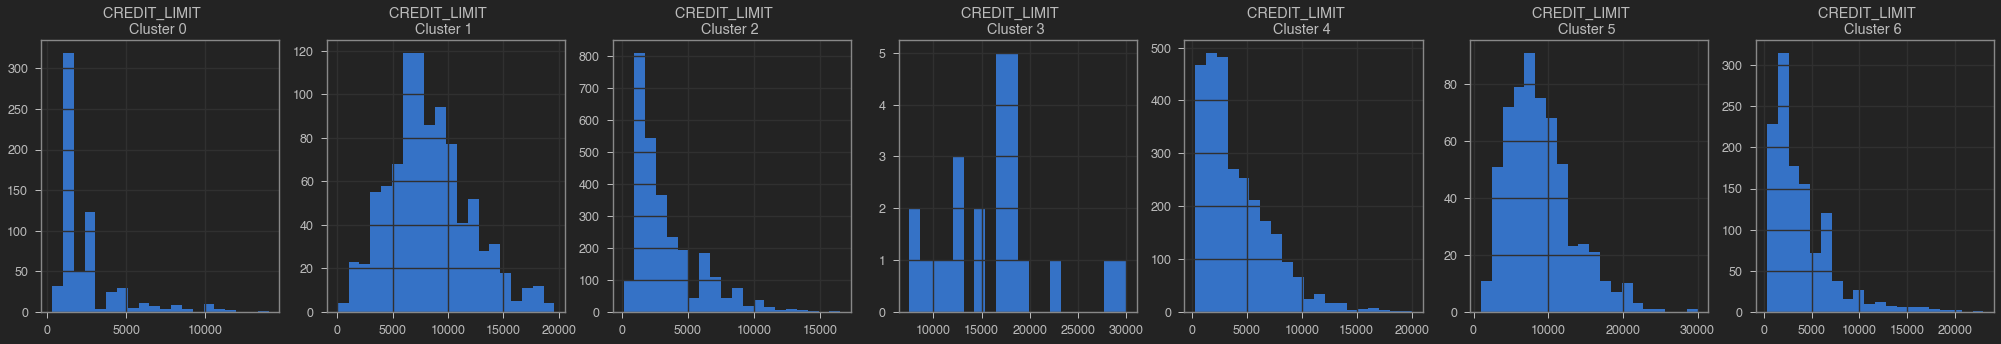

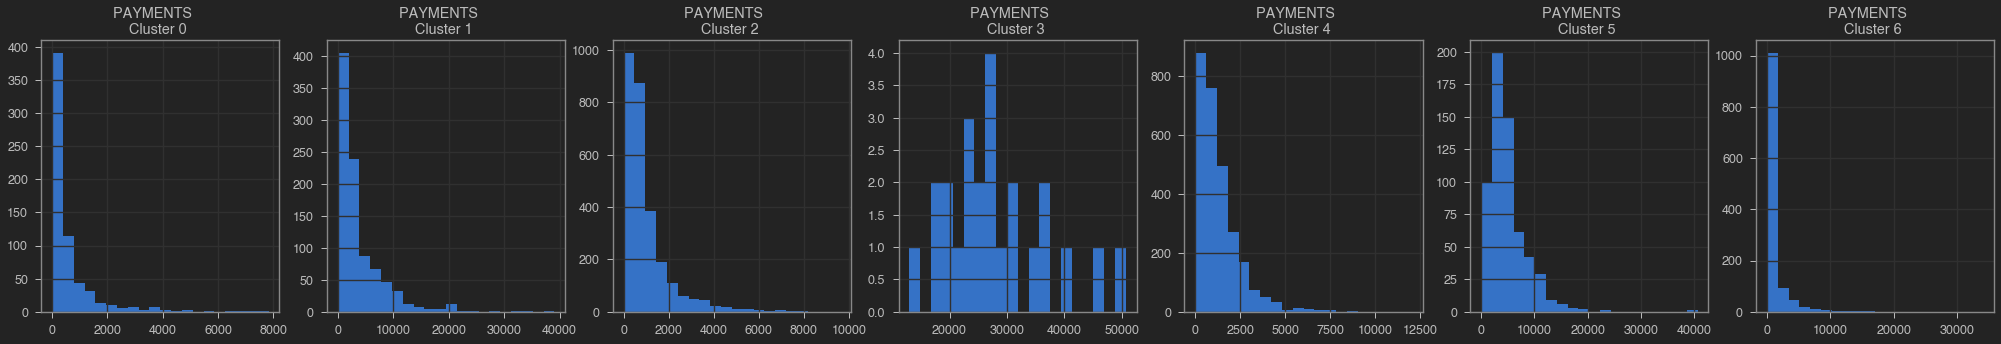

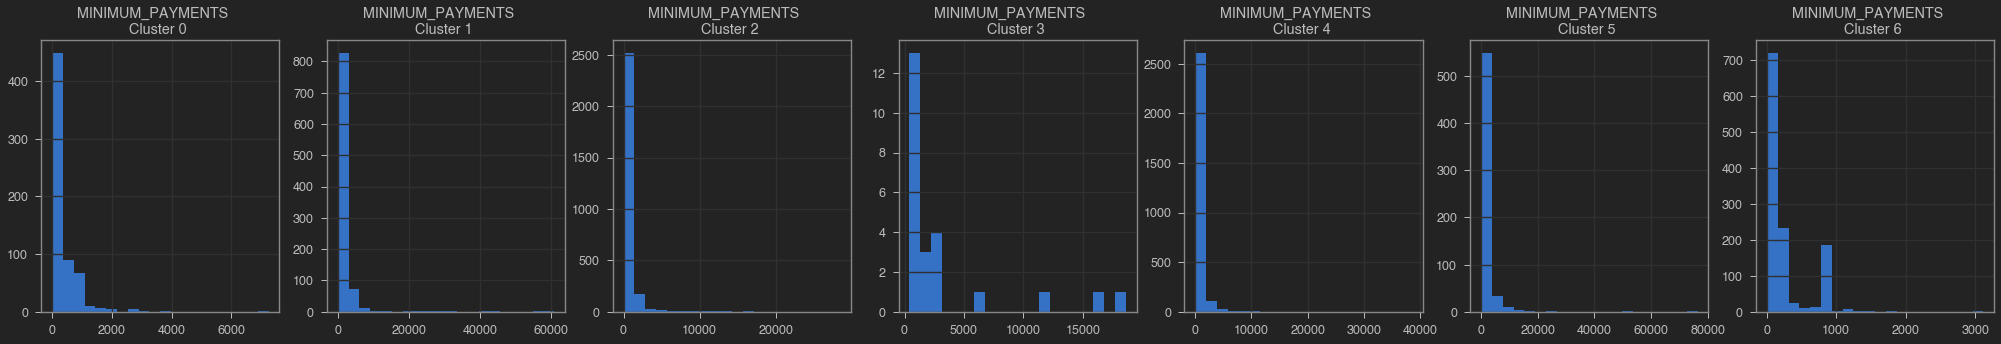

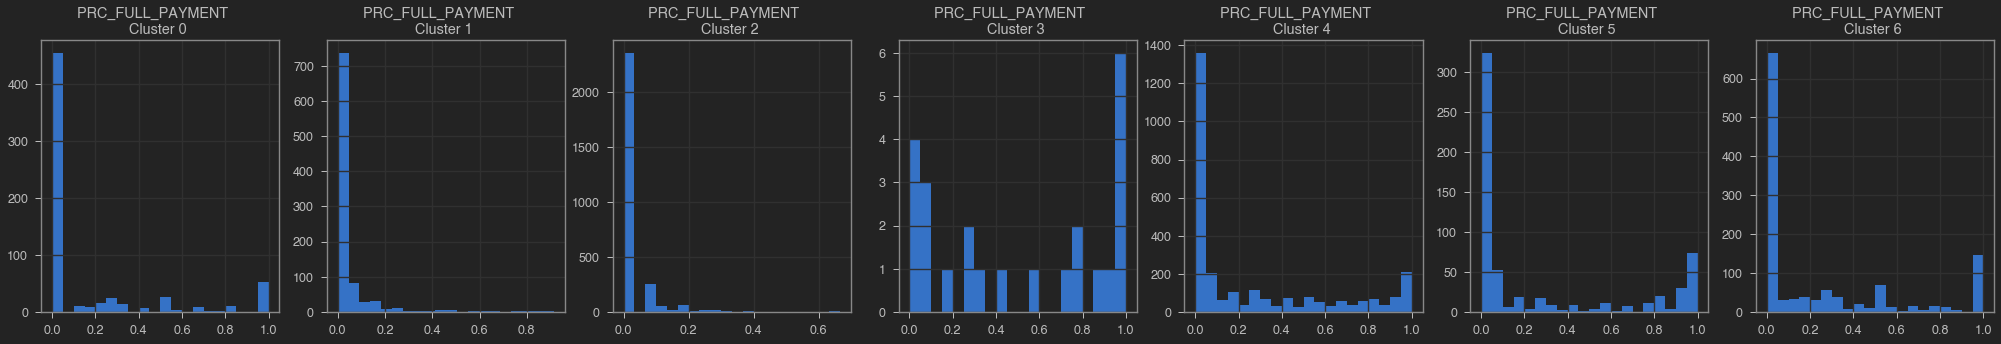

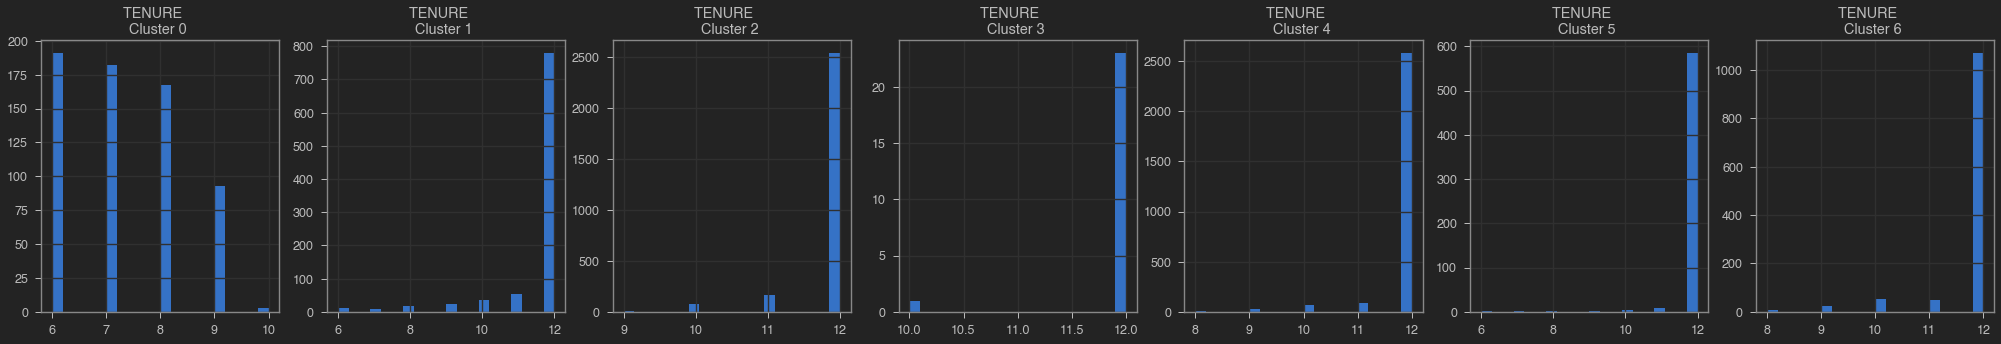

In [119]:
# Plot the histogram of various clusters 
# Histograms for every cluster
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()



MINI CHALLENGE #8:
 - Repeat the same procedure with a different number clusters instead of 7 (ex: 8 or 4)


In [124]:
# Repeated it with 4 clusters

kmeans_4 = KMeans(4)
kmeans_4.fit(creditcard_df_scaled) 
labels_4 = kmeans_4.labels_ 

In [125]:
kmeans_4.cluster_centers_.shape # this gives us all the centroids

(4, 17)

In [126]:
cluster_centers_4 = pd.DataFrame(data = kmeans_4.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers_4

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.265552         -0.368944 -0.343190        -0.230500   
1 -0.321688          0.242574  0.109044         0.000926   
2  0.954485          0.462694  3.125845         2.713251   
3  1.459578          0.384753 -0.234638        -0.163914   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.387798    -0.182691           -0.797823   
1               0.255904    -0.366373            0.983721   
2               2.406470    -0.155091            1.136338   
3              -0.253747     1.688972           -0.504848   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.389437                        -0.714246   
1                   0.317153                         0.874138   
2                   1.798653                         1.065918   
3                  -0.212939                        -0.450201   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.101500        -0.164607     -0.474987    -0.334417   
1              -0.462599        -0.360303      0.296985    -0.077298   
2              -0.319096        -0.170458      3.003251     1.429882   
3               1.745948         1.617143     -0.283580     0.838968   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.262060        -0.119249        -0.258866 -0.052972  
1 -0.138502        -0.091844         0.395041  0.057744  
2  1.919096         0.477421         0.454703  0.324140  
3  0.603821         0.490910        -0.406367 -0.097146

In [127]:
cluster_centers_4 = scaler.inverse_transform(cluster_centers_4)
cluster_centers_4 = pd.DataFrame(data = cluster_centers_4, columns = [creditcard_df.columns])
cluster_centers_4

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  1011.751528          0.789871   269.973466       209.853863   
1   894.907458          0.934734  1236.178934       593.974874   
2  3551.153761          0.986879  7681.620098      5095.878826   
3  4602.462714          0.968415   501.896219       320.373681   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              60.386625   595.759339            0.170146   
1             642.478274   210.570626            0.885165   
2            2587.208264   653.638891            0.946418   
3             181.607404  4520.724309            0.287731   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.086281                         0.080578   
1                   0.297070                         0.711842   
2                   0.739031                         0.788060   
3                   0.138934                         0.185516   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.114833         2.125503      2.903421  3277.703165   
1               0.042573         0.790021     22.091773  4213.207678   
2               0.071290         2.085575     89.359413  9696.943765   
3               0.484526        14.284641      7.661102  7546.957050   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   974.505090       586.301239         0.078001  11.446429  
1  1332.194205       650.167072         0.269258  11.594595  
2  7288.739497      1976.815179         0.286707  11.951100  
3  3481.145990      2008.251157         0.034859  11.387312

In [128]:
print(labels_4.shape,labels_4.max(), labels_4.min())

(8950,) 3 0


In [129]:
y_kmeans_4 = kmeans_4.fit_predict(creditcard_df_scaled)
y_kmeans_4

array([0, 3, 1, ..., 1, 0, 0], dtype=int32)

In [131]:
creditcard_df_cluster_4 = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels_4})], axis = 1)
creditcard_df_cluster_4.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        3  
2   622.066742        627.284787          0.000000      12        1  
3     0.000000        864.206542          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0

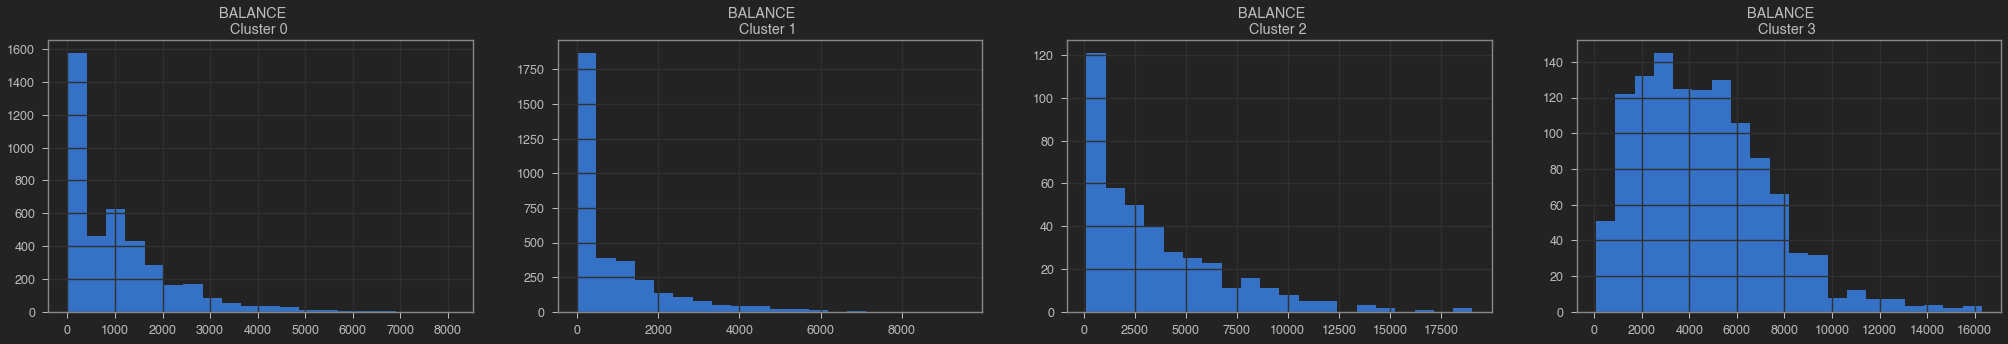

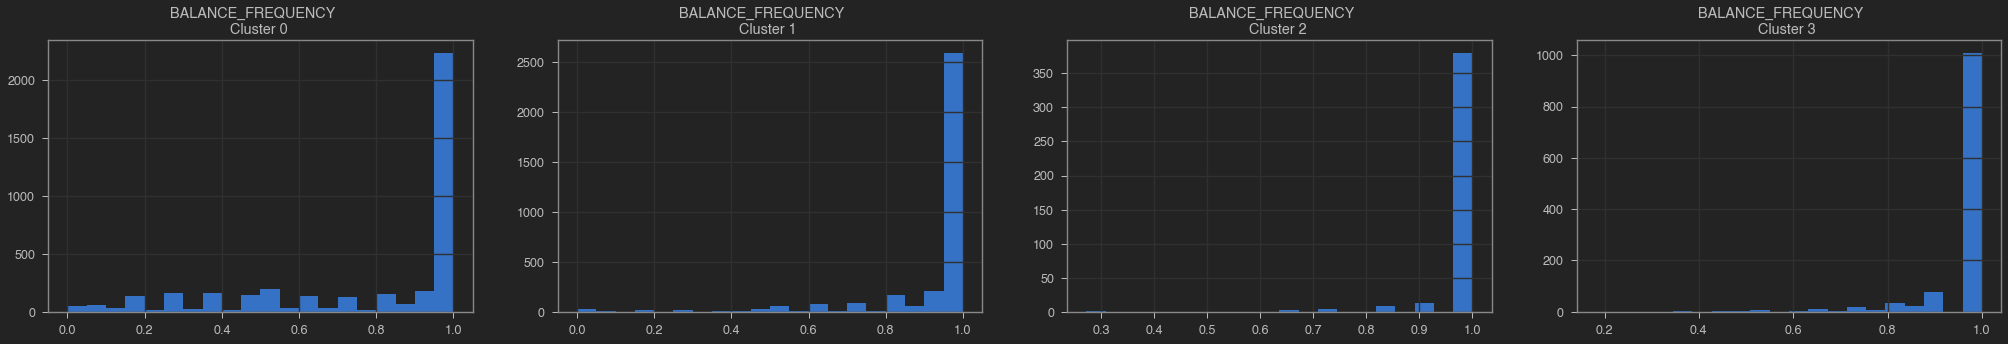

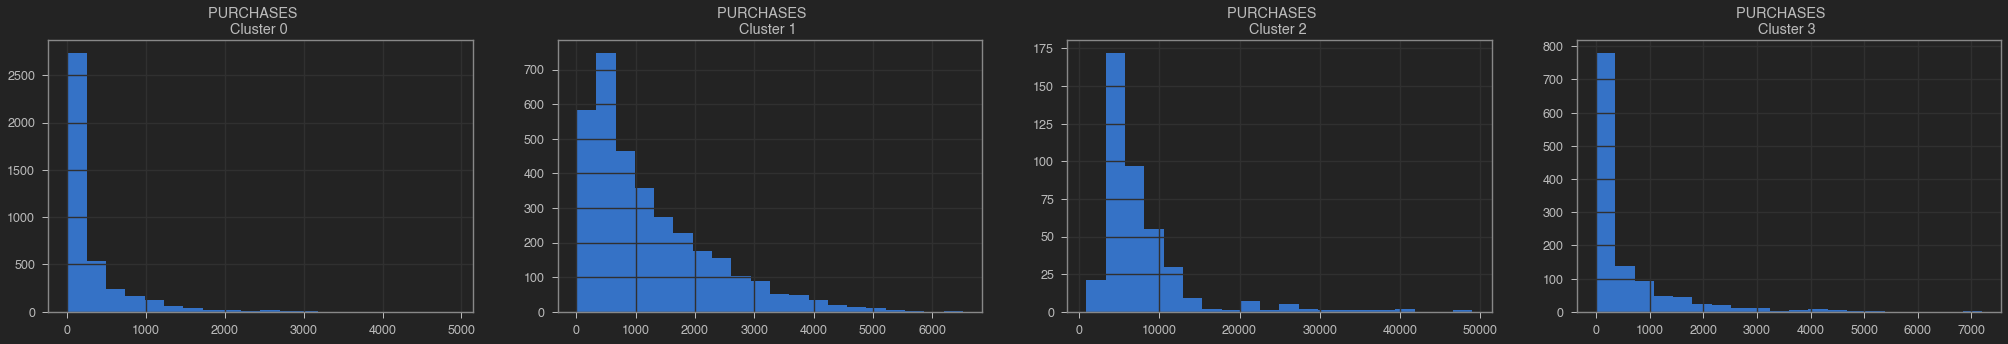

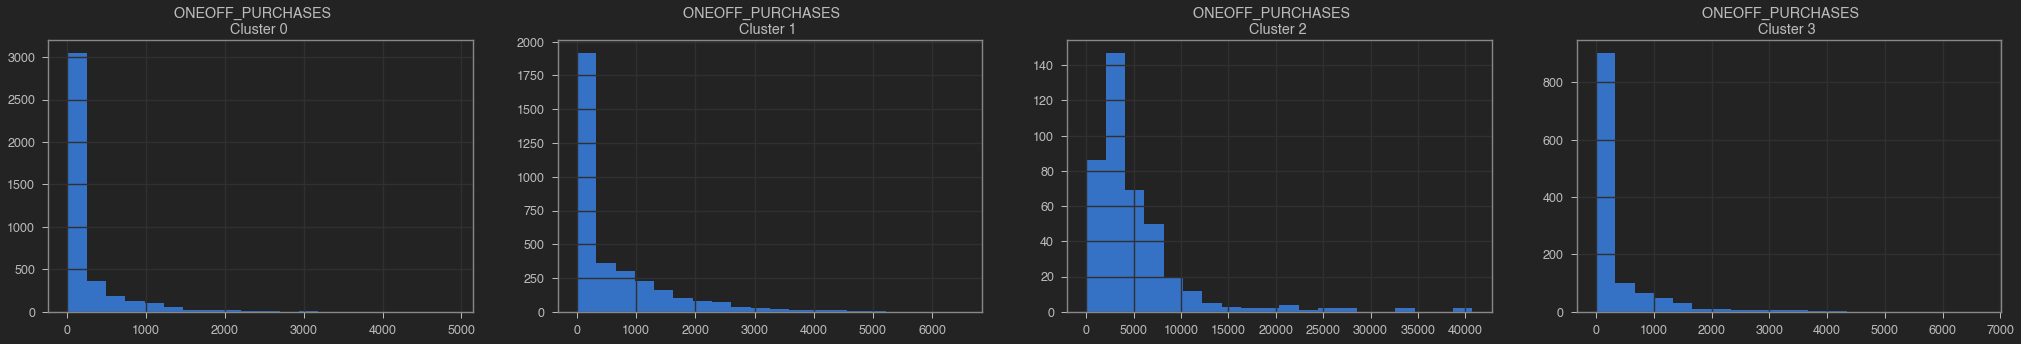

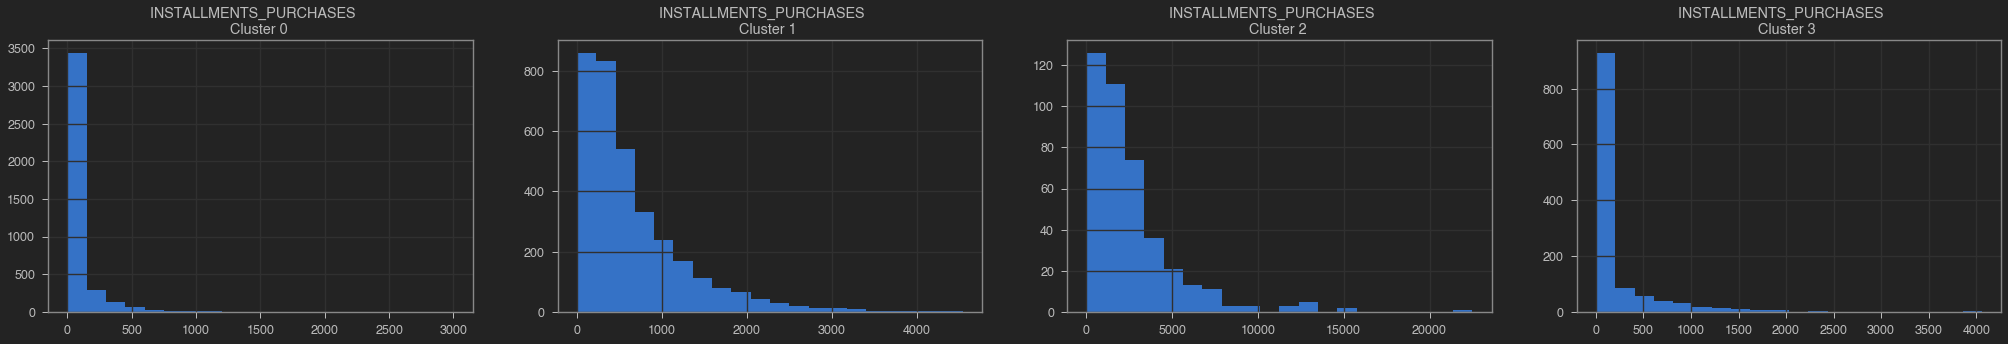

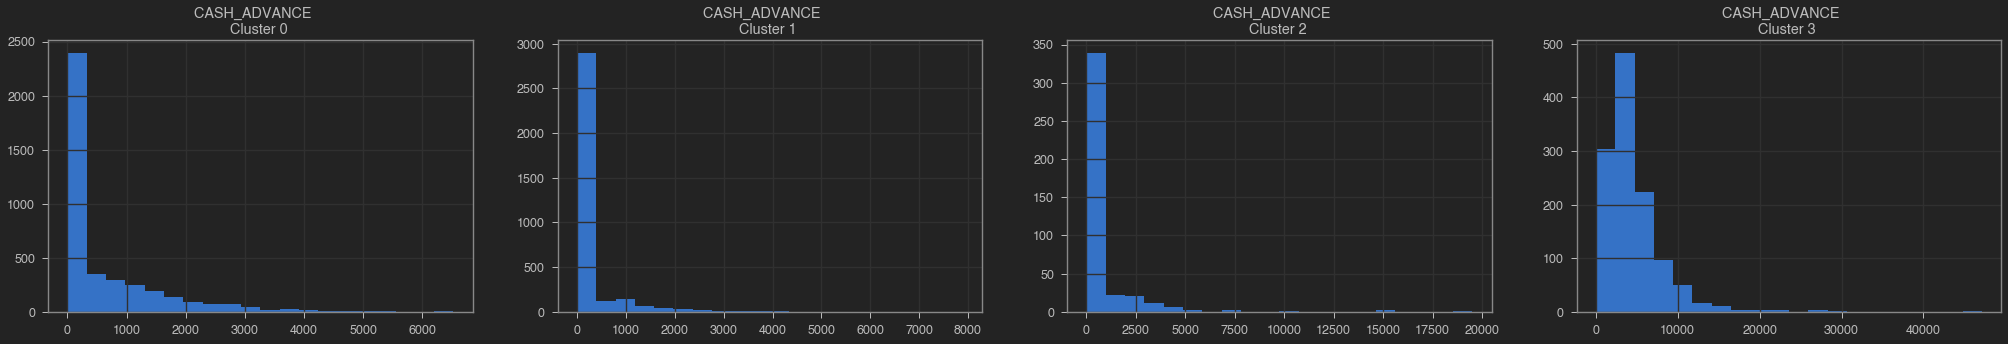

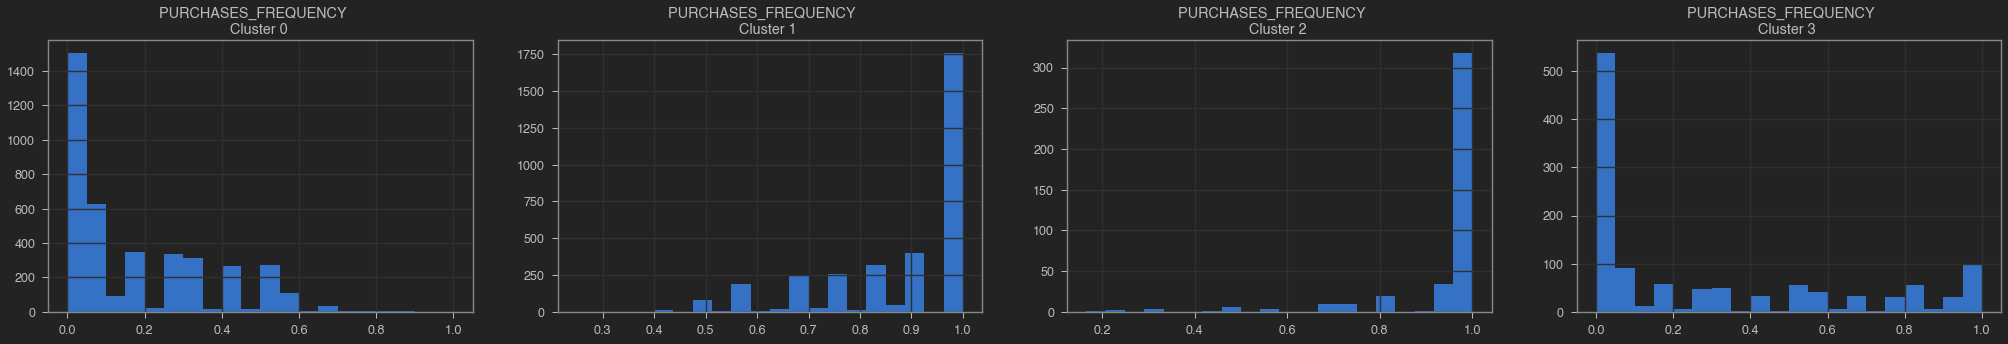

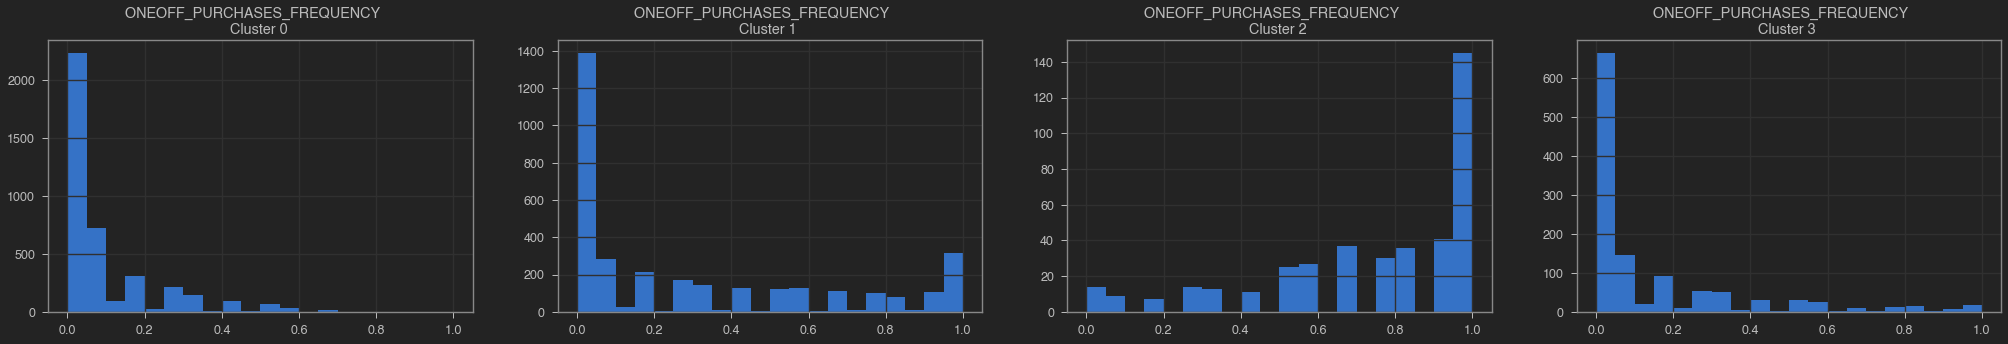

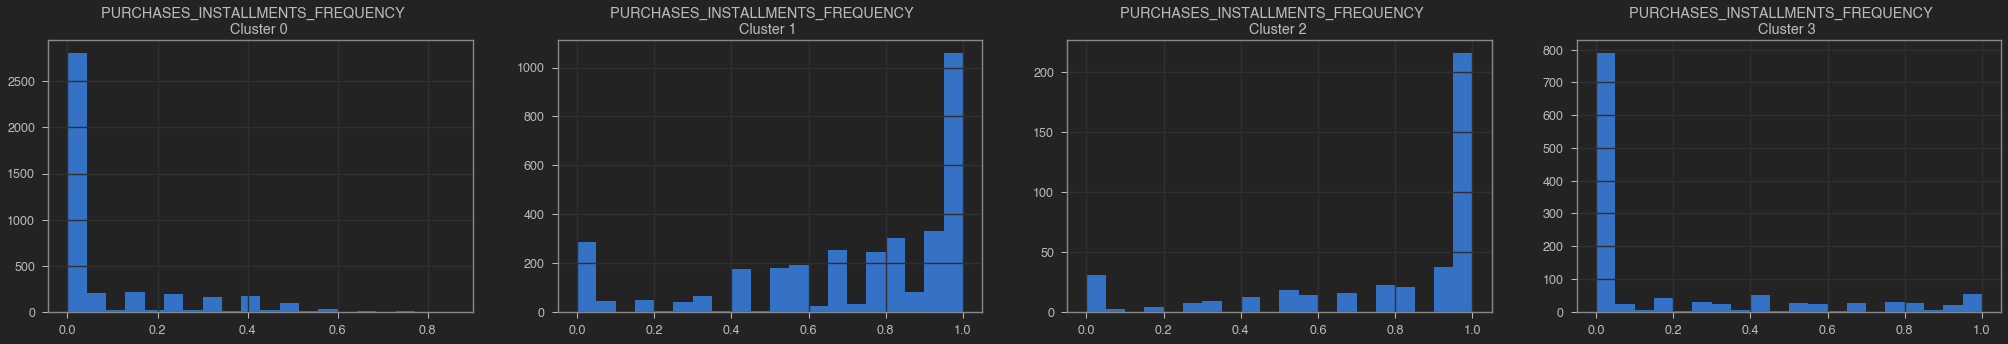

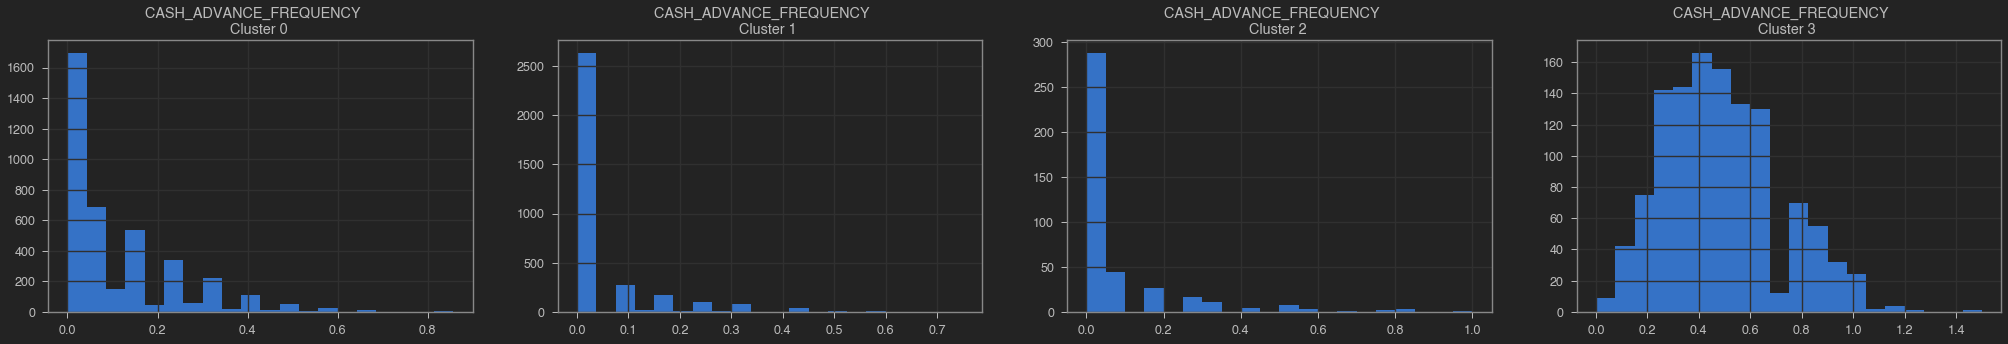

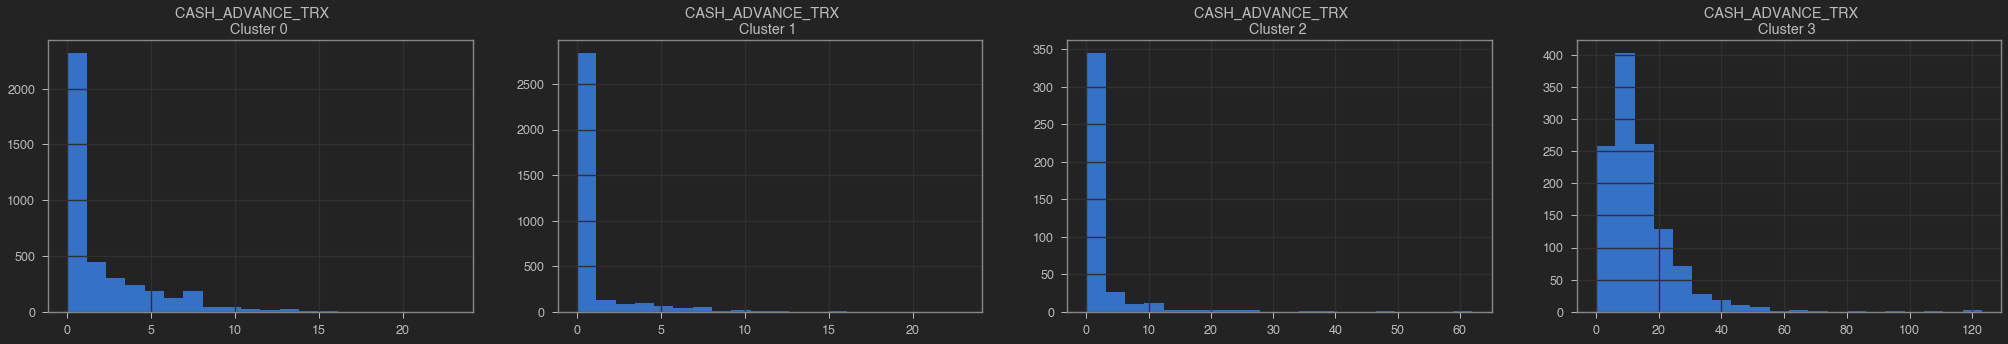

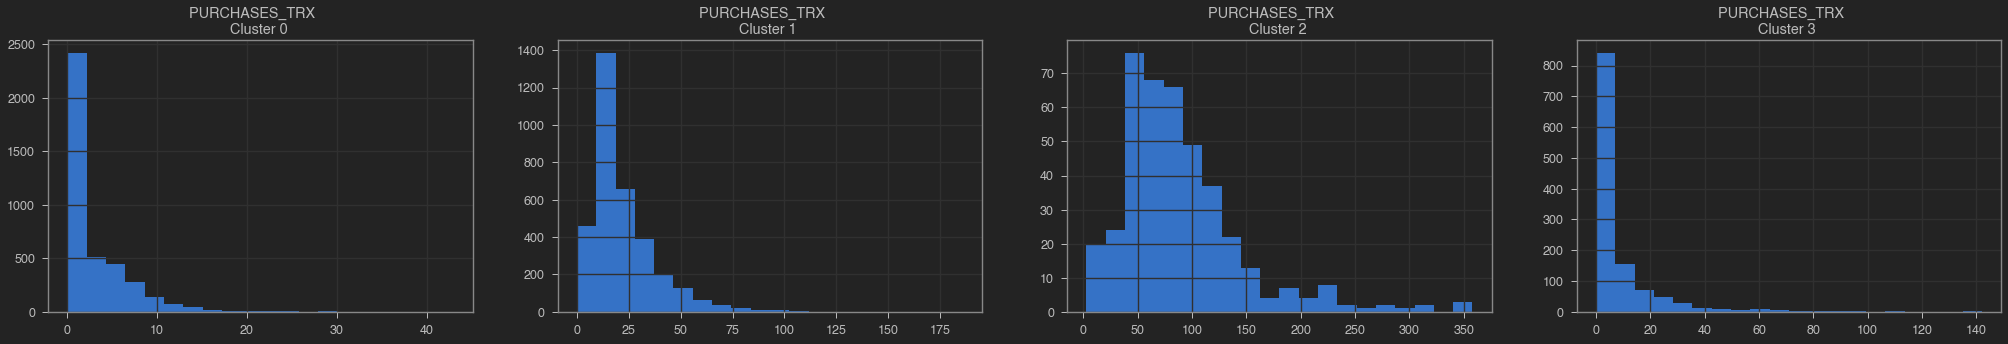

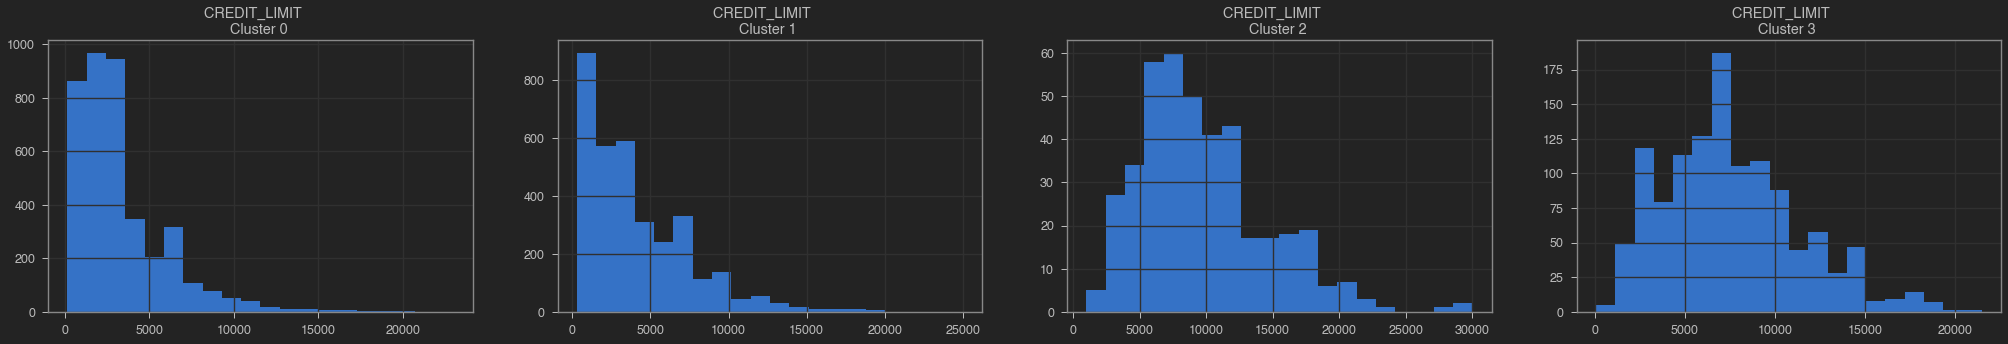

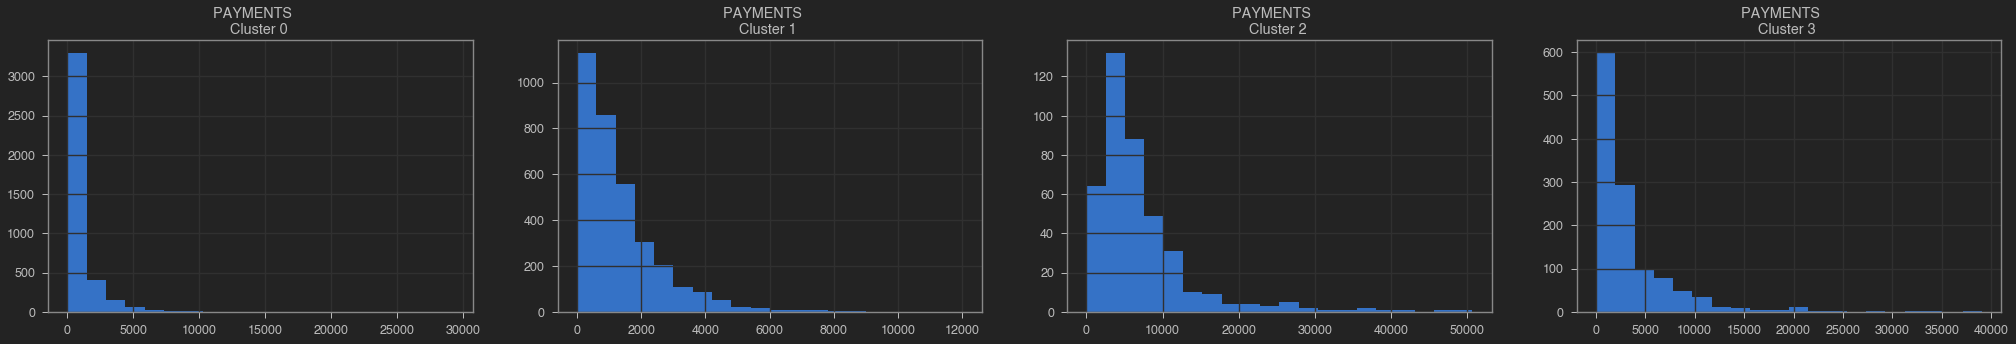

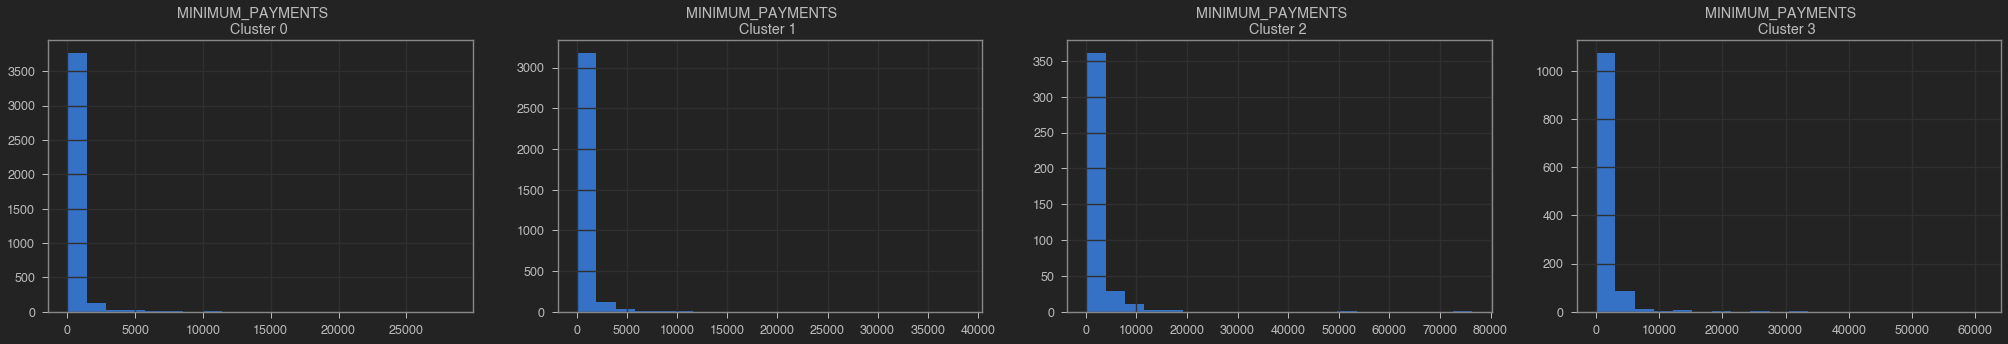

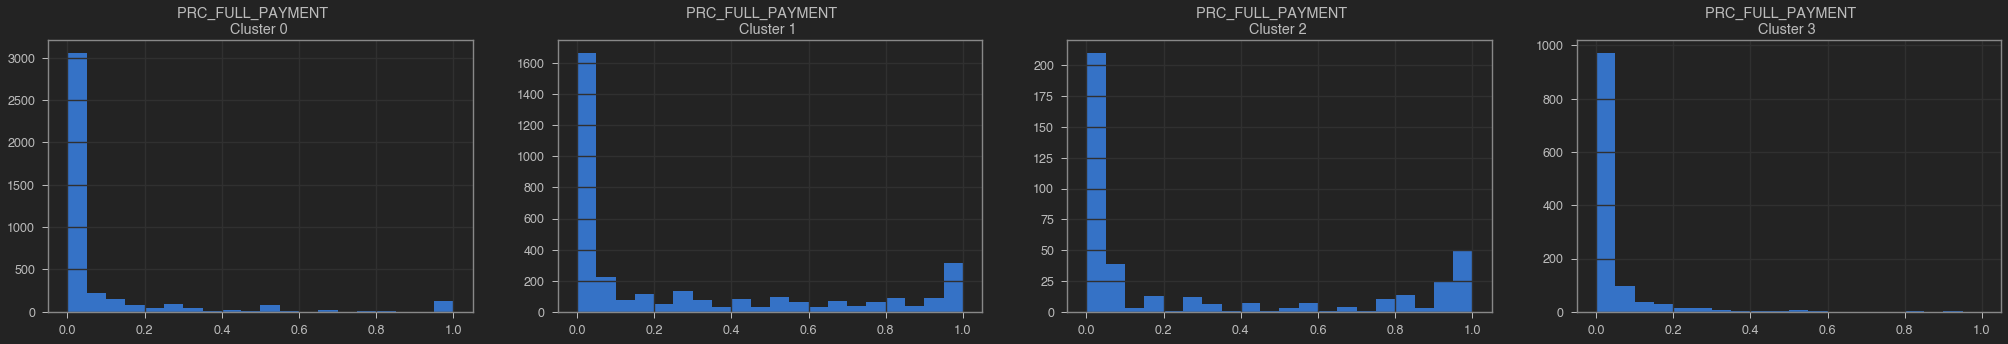

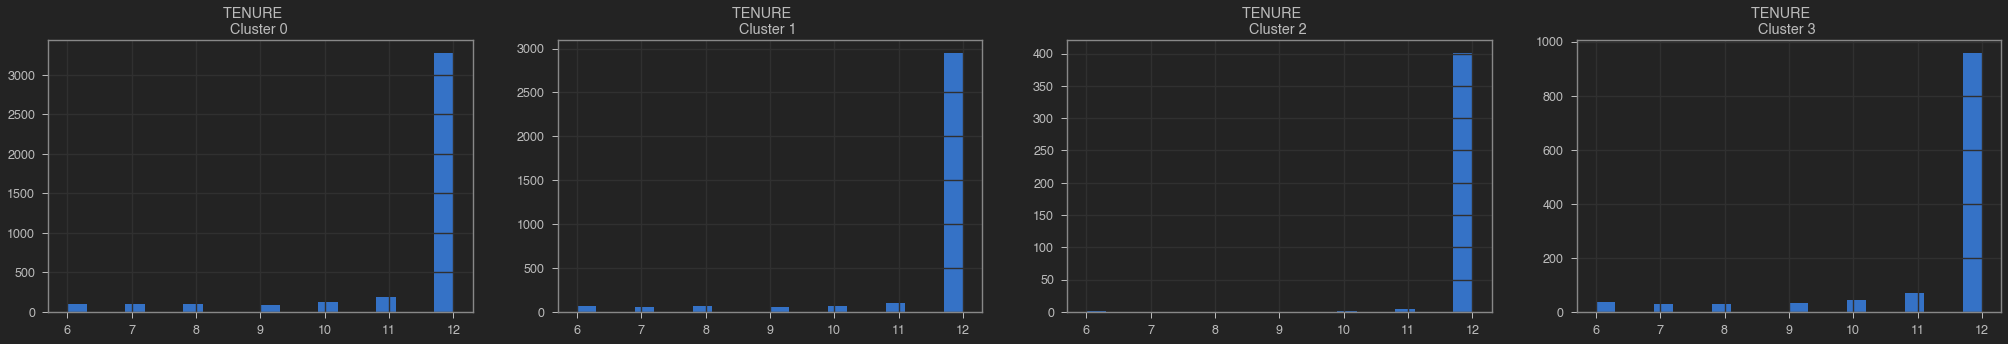

In [132]:
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(4):
    plt.subplot(1,4,j+1)
    cluster = creditcard_df_cluster_4[creditcard_df_cluster_4['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

# TASK 8: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

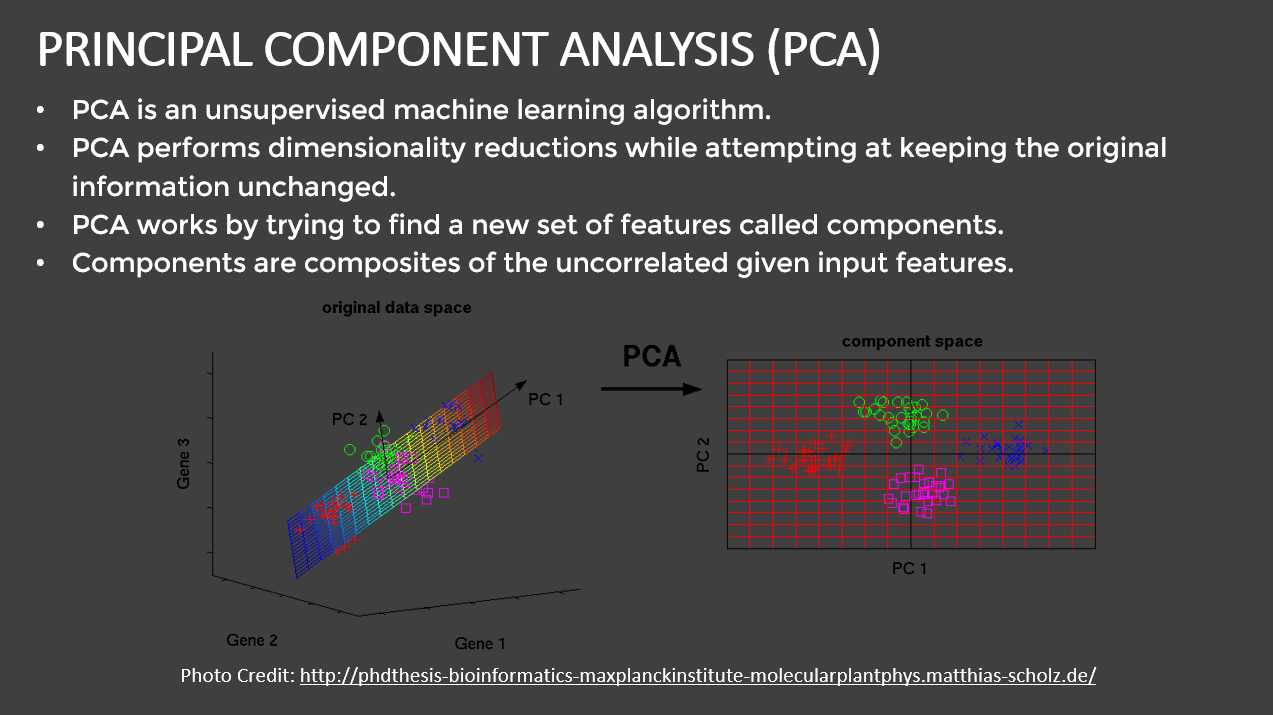

In [120]:
# Obtain the principal components 
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221707, -1.0764687 ],
       [-1.13829496,  2.50640423],
       [ 0.96969755, -0.38363392],
       ...,
       [-0.92619962, -1.81077601],
       [-2.33654954, -0.65795857],
       [-0.55642384, -0.40049218]])

In [121]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.682217 -1.076469
1 -1.138295  2.506404
2  0.969698 -0.383634
3 -0.873632  0.043210
4 -1.599428 -0.688612

In [122]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()
# For every row which corresponds to every datapoint in the original datapoint we now know which cluster it belongs to

pca1      pca2  cluster
0 -1.682217 -1.076469        2
1 -1.138295  2.506404        1
2  0.969698 -0.383634        4
3 -0.873632  0.043210        2
4 -1.599428 -0.688612        2

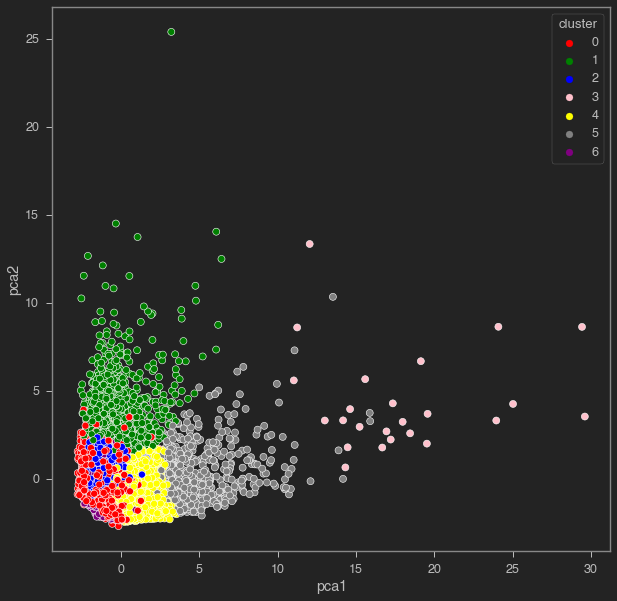

In [123]:
#plot for 7 clusters
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()


MINI CHALLENGE #9: 
 - Repeat task #8 with number of clusters = 4

In [133]:
# Obtain the principal components 
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222149, -1.07645176],
       [-1.13829503,  2.50646998],
       [ 0.9696904 , -0.38352255],
       ...,
       [-0.92620564, -1.81078378],
       [-2.33655563, -0.65796189],
       [-0.55641993, -0.40046361]])

In [134]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.682221 -1.076452
1 -1.138295  2.506470
2  0.969690 -0.383523
3 -0.873629  0.043162
4 -1.599435 -0.688580

In [135]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels_4})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.682221 -1.076452        0
1 -1.138295  2.506470        3
2  0.969690 -0.383523        1
3 -0.873629  0.043162        0
4 -1.599435 -0.688580        0

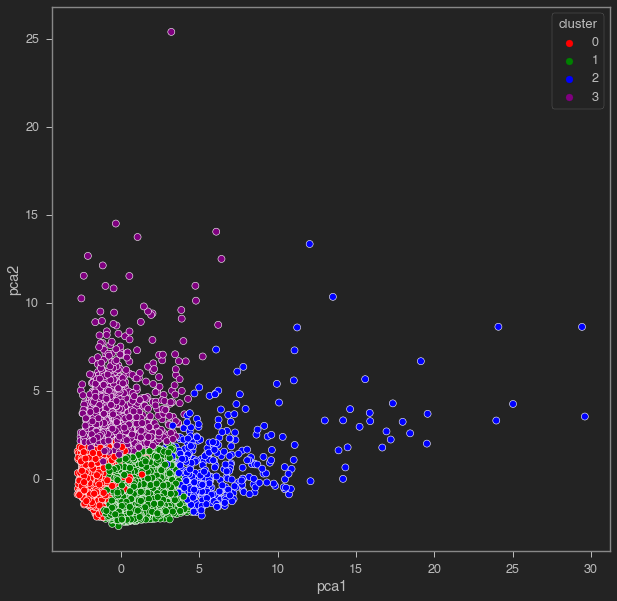

In [136]:
#plot for 4 clusters
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','purple'])
plt.show()
